In [41]:
#Librerias usadas en el desarrollo del programa
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import nc_time_axis
import cftime
import requests
import os
import statsmodels.api as sm
from scipy.stats import pearsonr



In [42]:
#URL con la información de dropbox con el dataset de sst
#url_sst = "https://www.dropbox.com/scl/fi/3wavw5o9o3z1x1sipytc4/sst.mon.mean.nc?rlkey=o27pjkaa22ch3vjerpqey0cle&st=3cw45r7v&dl=1"

#Descargar el archivo temporalmente
#response = requests.get(url_sst)
#with open('sst.nc', 'wb') as f:
#    f.write(response.content)

#Abrir el archivo descargado en dataframe
df_sst = xr.open_dataset('sst.nc')
df_sst #Tos es igual a la temperatura en la supeficie del oceano - Datos en Kelvin - Datos Mensuales


<xarray.Dataset>
Dimensions:  (time: 516, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2024-08-01
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

In [43]:
#URL con la información de dropbox con el dataset de slp
#url_slp = "https://www.dropbox.com/scl/fi/xjyo67lv366earknxuxjx/slp.mon.mean.nc?rlkey=42y7e5lq0fpah3vlt2piy4hja&st=evl10nst&dl=1"
# Descargar el archivo temporalmente
#response = requests.get(url_slp)
#with open('slp.nc', 'wb') as f:
#    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_slp = xr.open_dataset('slp.nc')
df_slp #Ver los datos del slp 



<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 919)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-07-01
Data variables:
    slp      (time, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  These...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 18:12:35 2000: ncrcat -d time,0,622 /Datasets/...
    title:          monthly mean slp from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [44]:
#URL con la información de dropbox con el dataset de olr
#url_olr = "https://www.dropbox.com/scl/fi/3f520wpuuvgb00567vd17/olr.mon.mean.1975.nc?rlkey=gv45ar9na6slnd504uis32eta&st=855gy7kw&dl=1"
# Descargar el archivo temporalmente
#response = requests.get(url_olr)
#with open('olr.nc', 'wb') as f:
#    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_olr = xr.open_dataset('olr.nc')
df_olr #Ver los datos del olr 

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 576)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1975-01-01 1975-02-01 ... 2022-12-01
Data variables:
    olr      (time, lat, lon) float32 ...
Attributes:
    title:          Monthly means of OLR from interpolated OLR dataset
    description:    Data is interpolated in time and space from NOAA twice-da...
    platform:       Observation
    Conventions:    CF-1.2
    References:     https://www.psl.noaa.gov/data/gridded/data.interp_OLR.html
    references:     https://www.esrl.noaa.gov/psd/data/gridded/data.interp_OL...
    Citation:       Liebmann and Smith: June 2006: Description of a Complete ...
    dataset_title:  NOAA Interpolated Outgoing Longwave Radiation (OLR)
    source:         ftp.cpc.ncep.noaa.gov precip/noaa..
    date_modified:  12 Feb 2019
    history:        Tue Dec 12 11:00:30 2023: ncks -d time,7, olr.mon.mean.nc...
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [45]:
#URL con la información de dropbox con el dataset de U winds: Vientos (Vientos zonales)
#url_u_winds = "https://www.dropbox.com/scl/fi/pb5wp86v7j4j64tc2247u/uwnd.10m.mon.mean.nc?rlkey=nwjwdy93thksxhvblm9m0ky2a&st=27rdj43x&dl=1"
# Descargar el archivo temporalmente
#response = requests.get(url_u_winds)
#with open('u_winds.nc', 'wb') as f:
#    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_u_winds = xr.open_dataset('u_winds.nc')
df_u_winds #Ver los datos del los vientos zonales a 10 metros del nivel del mar

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 919)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-07-01
Data variables:
    uwnd     (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121013
    history:        renamevars Thu Feb  1 09:41:58 2001 from uwnd10m.mon.mean...
    title:          monthly mean uwnd.10m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [46]:
#URL con la información de dropbox con el dataset de U winds: Vientos (Vientos meridoniales)
#url_v_winds = "https://www.dropbox.com/scl/fi/uhb8a307ashl2gpop197u/vwnd.10m.mon.mean.nc?rlkey=dlddkzii8okq2gkrab1fhyg0h&st=bm9kqff4&dl=1"
# Descargar el archivo temporalmente
#response = requests.get(url_v_winds)
#with open('v_winds.nc', 'wb') as f:
#    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_v_winds = xr.open_dataset('v_winds.nc')
df_v_winds #Ver los datos del los vientos meridoniales a 10 metros del nivel del mar

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 919)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-07-01
Data variables:
    vwnd     (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121013
    history:        renamevars Thu Feb  1 09:47:30 2001 from vwnd10m.mon.mean...
    title:          monthly mean vwnd.10m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

Empezamos con el analisis de los datos que vamos a trabajar en para la predicción del ENSO en la region del Niño 3.4

Nos concentraremos en la región del Niño 3.4 y los datos iran desde el 20 de Enero de 1951 hasta 1 de Diciembre de 2010

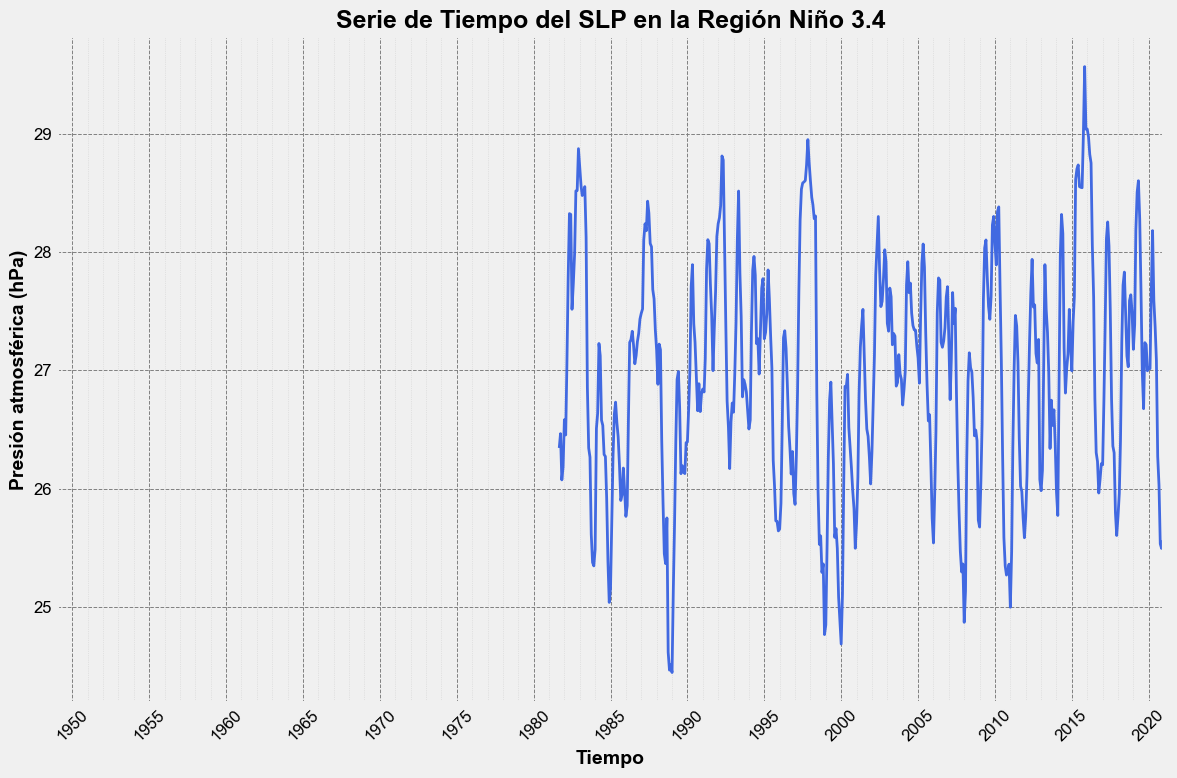

In [47]:
# SST

plt.rc('font', family='Arial', size=10)

df_sst_nino3_4 = df_sst.sel(lat=slice(-5, 5), lon=slice(190, 240))  # DataArray de la región Niño 3.4
sst = df_sst_nino3_4['sst']
# Calcular el promedio sobre las dimensiones de latitud y longitud
sst_mean = sst.mean(dim=['lat', 'lon'])

# Graficar la serie de tiempo con un estilo alternativo
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo del promedio
ax.plot(sst_mean['time'], sst_mean, color='royalblue', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Serie de Tiempo del SLP en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Presión atmosférica (hPa)', fontsize=14, weight='bold')

# Asegurar que el eje X cubra el rango de fechas desde 1951 hasta 2010
ax.set_xlim(sst_mean['time'].min().values, sst_mean['time'].max().values)

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Ajustar los límites del eje Y si es necesario
ax.set_xlim(np.datetime64('1949-01-01'), np.datetime64('2020-12-31'))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

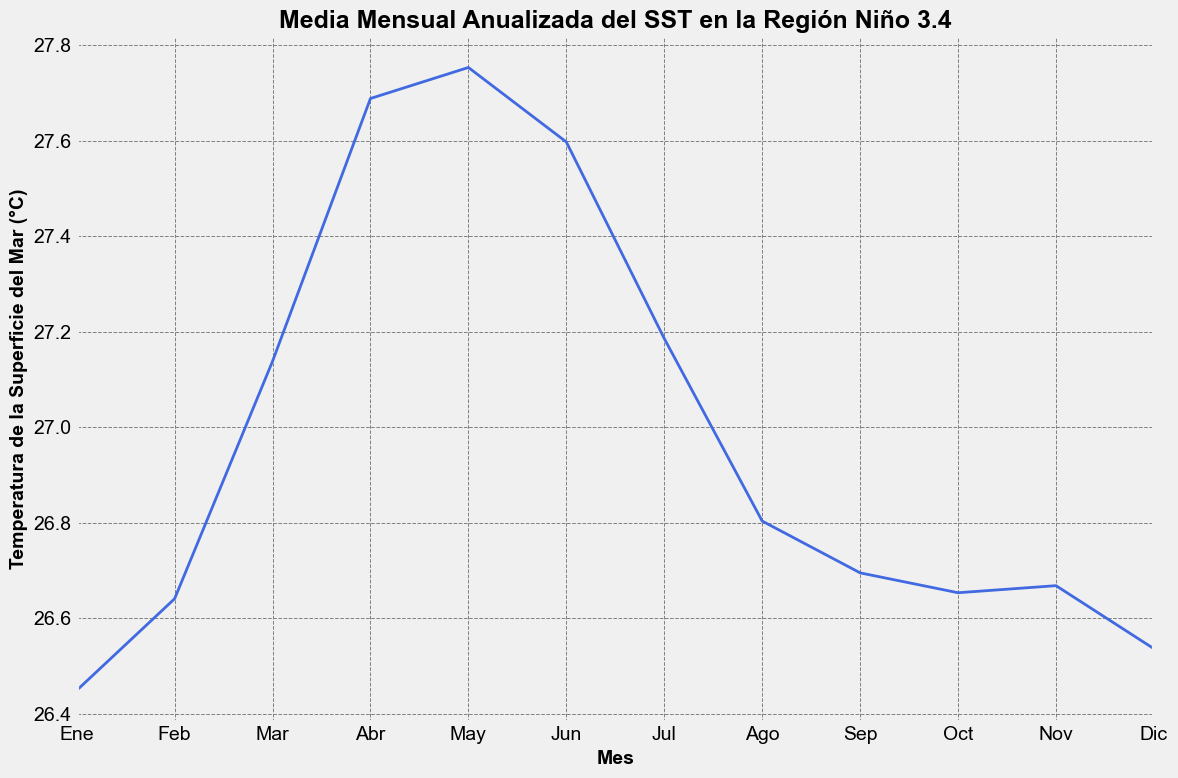

In [48]:
#ESTADISTICA DESCRIPTIVA DEL STT
#Media mensual anualizada -- Desviación Estándar Mensual Anualizada -- Anomalía Mensual -- Tendencia


#Media mensual anualizada

#Crear un DataFrame de pandas para manejar la serie temporal
sst_df = pd.DataFrame({'sst': sst_mean.values}, index=sst_mean['time'].values)

# Calcular la media mensual anualizada
sst_monthly_mean = sst_df.resample('M').mean()  # Media mensual
sst_monthly_mean_anualizada = sst_monthly_mean.groupby(sst_monthly_mean.index.month).mean()

# Graficar la media mensual anualizada
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo de la media mensual anualizada
ax.plot(sst_monthly_mean_anualizada.index, sst_monthly_mean_anualizada['sst'], color='royalblue', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Media Mensual Anualizada del SST en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Temperatura de la Superficie del Mar (°C)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()

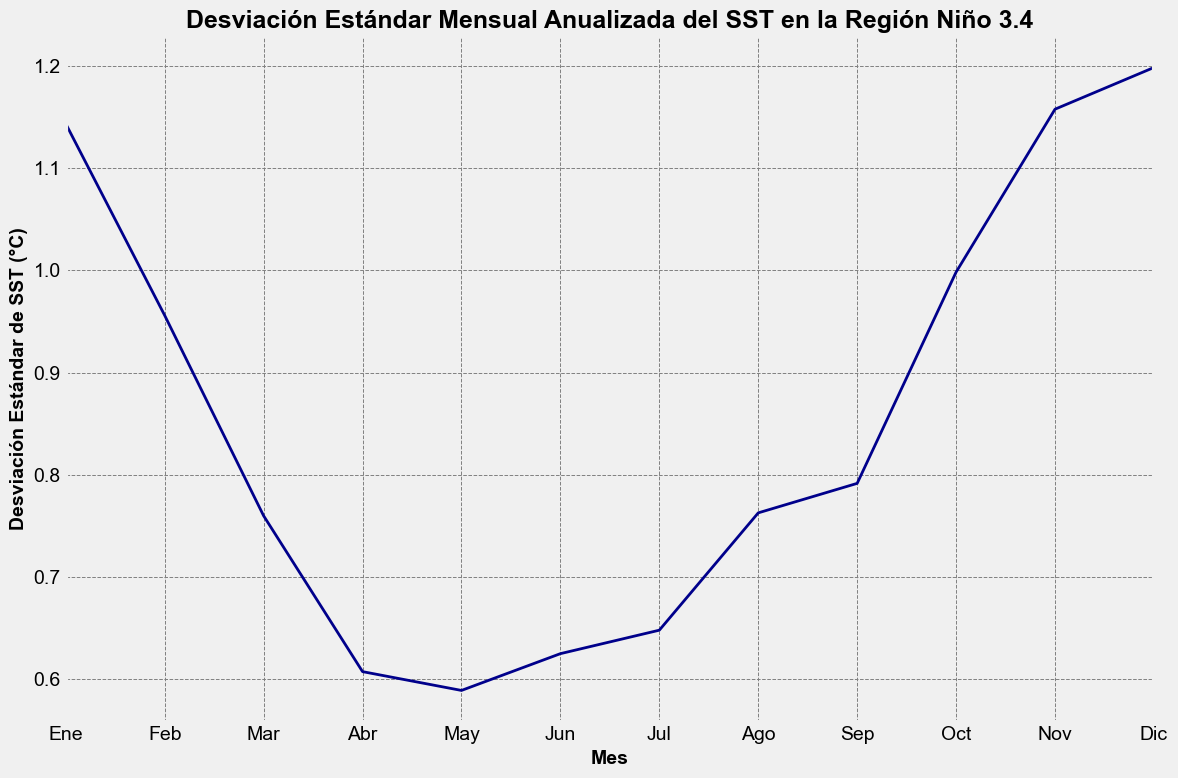

In [49]:
#Desviación estandar mensual anualizada


# Calcular la desviación estándar mensual anualizada
sst_monthly_std_anualizada = sst_df.groupby(sst_df.index.month).std()

# Graficar la desviación estándar mensual anualizada
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro estilo disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la desviación estándar mensual anualizada
ax.plot(sst_monthly_std_anualizada.index, sst_monthly_std_anualizada['sst'], color='darkblue', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Desviación Estándar Mensual Anualizada del SST en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Desviación Estándar de SST (°C)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

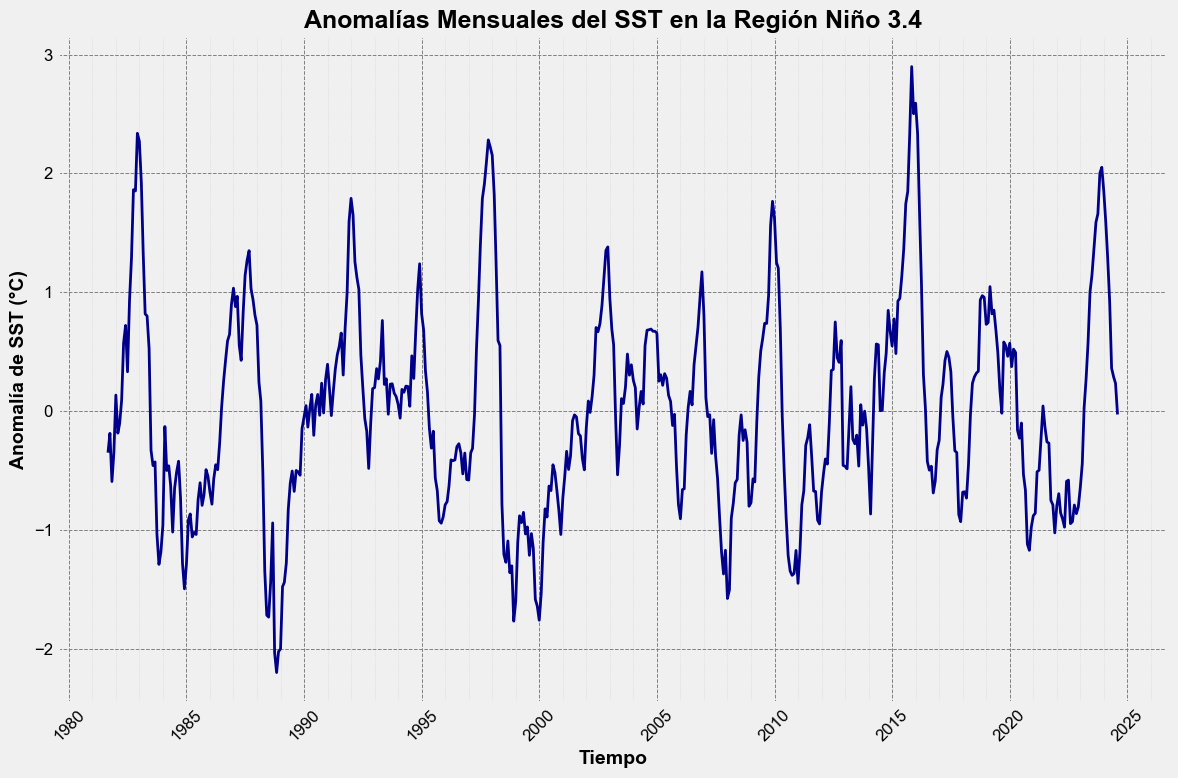

In [50]:
#Anomalia Mensual

# Calcular las anomalías mensuales
sst_anomalies = sst_df.copy()
sst_anomalies['Anomalía'] = sst_df['sst'] - sst_anomalies.index.month.map(sst_monthly_mean_anualizada['sst'])

# Graficar las anomalías mensuales
plt.style.use('fivethirtyeight')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar las anomalías mensuales
ax.plot(sst_anomalies.index, sst_anomalies['Anomalía'], color='darkblue', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Anomalías Mensuales del SST en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Anomalía de SST (°C)', fontsize=14, weight='bold')

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año y mes para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

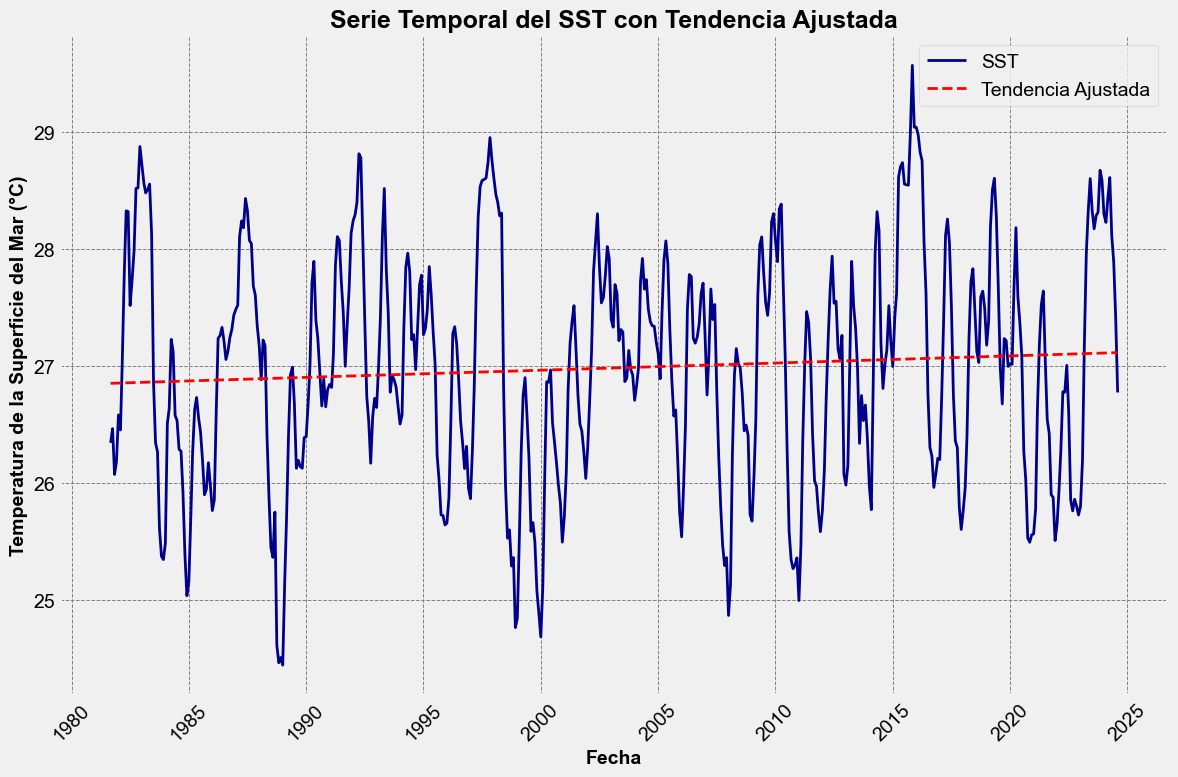

                            OLS Regression Results                            
Dep. Variable:                    sst   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.084
Date:                Thu, 26 Sep 2024   Prob (F-statistic):             0.0797
Time:                        12:22:50   Log-Likelihood:                -720.71
No. Observations:                 516   AIC:                             1445.
Df Residuals:                     514   BIC:                             1454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.8530      0.086    311.692      0.0

In [51]:
#Analisis de tendencia

# Ajustar un modelo de regresión lineal para capturar la tendencia
sst_df['Time'] = np.arange(len(sst_df))
X = sm.add_constant(sst_df['Time'])
model = sm.OLS(sst_df['sst'], X).fit()

# Obtener los valores ajustados y residuales
sst_df['Trend'] = model.predict(X)
sst_df['Residuals'] = sst_df['sst'] - sst_df['Trend']

# Graficar la serie temporal y la tendencia ajustada
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(sst_df.index, sst_df['sst'], color='darkblue', linewidth=2, label='SST')
ax.plot(sst_df.index, sst_df['Trend'], color='red', linestyle='--', linewidth=2, label='Tendencia Ajustada')
ax.set_title('Serie Temporal del SST con Tendencia Ajustada', fontsize=18, weight='bold')
ax.set_xlabel('Fecha', fontsize=14, weight='bold')
ax.set_ylabel('Temperatura de la Superficie del Mar (°C)', fontsize=14, weight='bold')
ax.legend()
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Imprimir el resumen del modelo de regresión
print(model.summary())

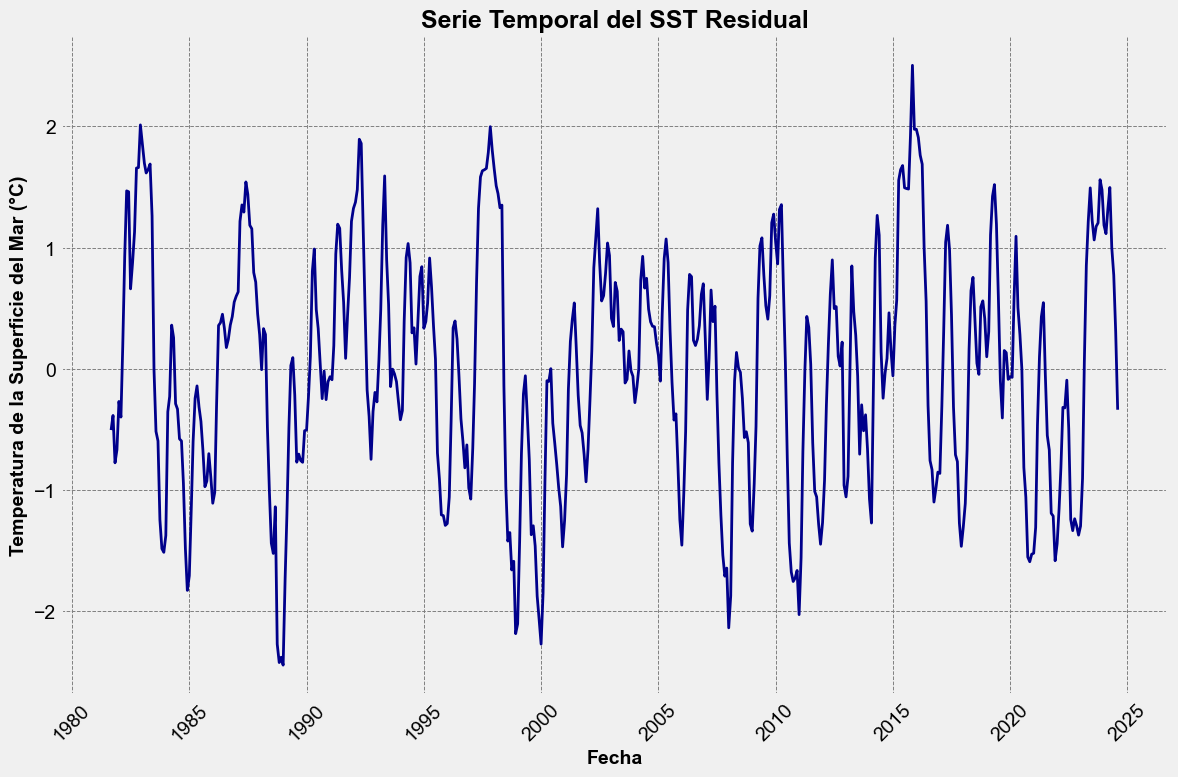

In [52]:
#Serie de tiempo residual
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(sst_df.index, sst_df['Residuals'], color='darkblue', linewidth=2, label='SST')
ax.set_title('Serie Temporal del SST Residual', fontsize=18, weight='bold')
ax.set_xlabel('Fecha', fontsize=14, weight='bold')
ax.set_ylabel('Temperatura de la Superficie del Mar (°C)', fontsize=14, weight='bold')
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

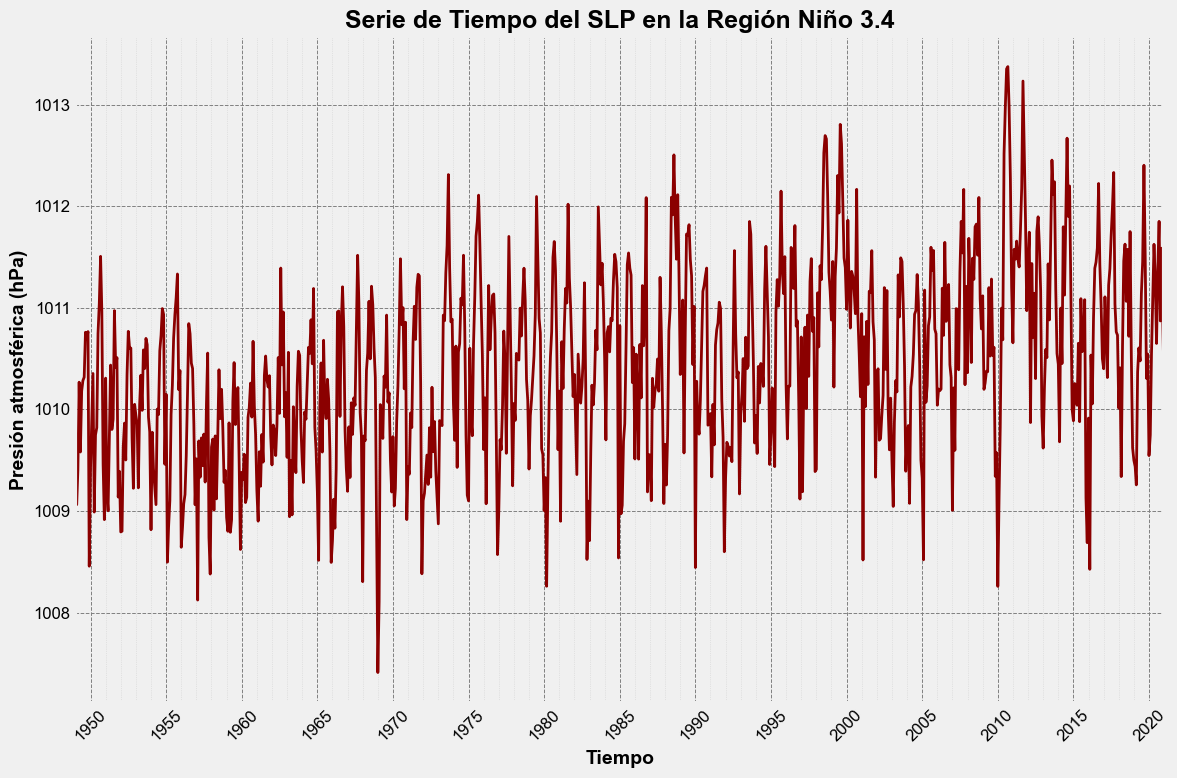

In [53]:
# SLP

plt.rc('font', family='Arial', size=10)

df_slp_nino3_4 = df_slp.sel(lat=slice(5, -5), lon=slice(190, 240))  # DataArray de la región Niño 3.4
slp = df_slp_nino3_4['slp']
# Calcular el promedio sobre las dimensiones de latitud y longitud
slp_mean = slp.mean(dim=['lat', 'lon'])

# Graficar la serie de tiempo con un estilo alternativo
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo del promedio
ax.plot(slp_mean['time'], slp_mean, color='darkred', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Serie de Tiempo del SLP en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Presión atmosférica (hPa)', fontsize=14, weight='bold')

# Asegurar que el eje X cubra el rango de fechas desde 1951 hasta 2010
ax.set_xlim(slp_mean['time'].min().values, slp_mean['time'].max().values)

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Ajustar los límites del eje Y si es necesario
ax.set_xlim(np.datetime64('1949-01-01'), np.datetime64('2020-12-31'))

# Mostrar el gráfico
plt.tight_layout()
plt.show()


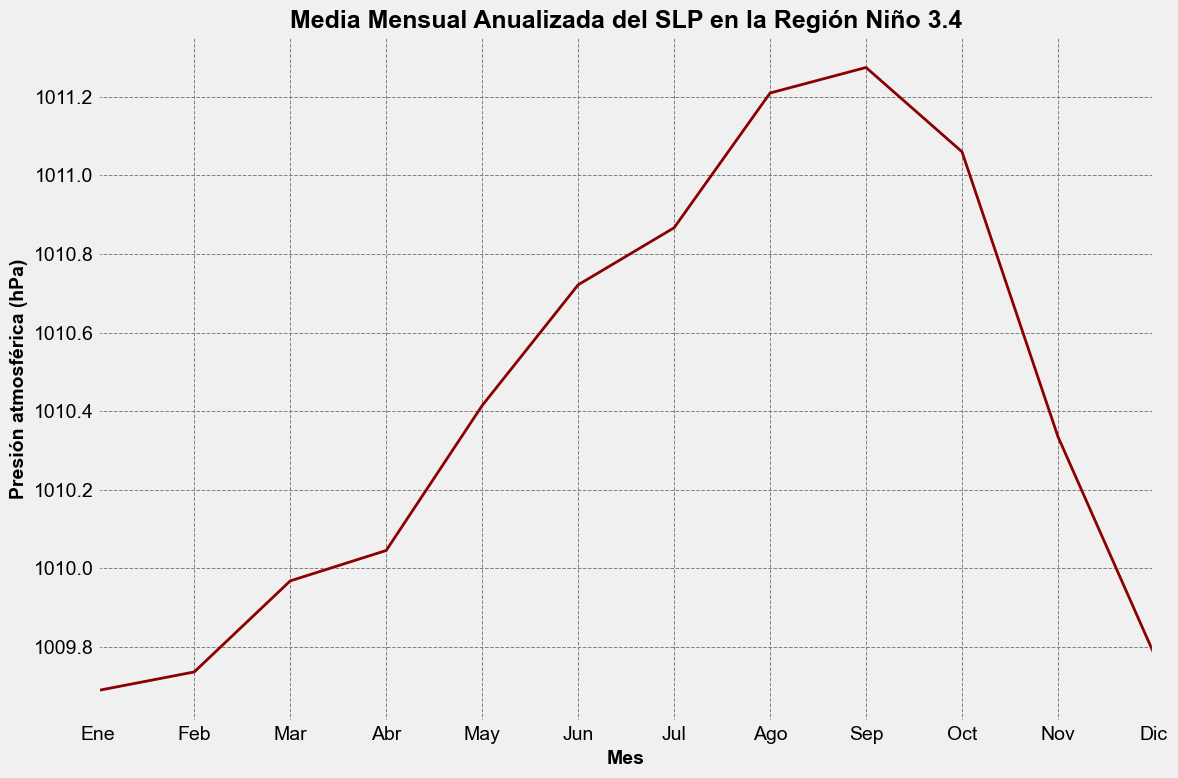

In [54]:
#Media mensual anualizada

#Crear un DataFrame de pandas para manejar la serie temporal
slp_df = pd.DataFrame({'SLP': slp_mean.values}, index=slp_mean['time'].values)

# Calcular la media mensual anualizada
slp_monthly_mean = slp_df.resample('M').mean()  # Media mensual
slp_monthly_mean_anualizada = slp_monthly_mean.groupby(slp_monthly_mean.index.month).mean()

# Graficar la media mensual anualizada
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo de la media mensual anualizada
ax.plot(slp_monthly_mean_anualizada.index, slp_monthly_mean_anualizada['SLP'], color='darkred', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Media Mensual Anualizada del SLP en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Presión atmosférica (hPa)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

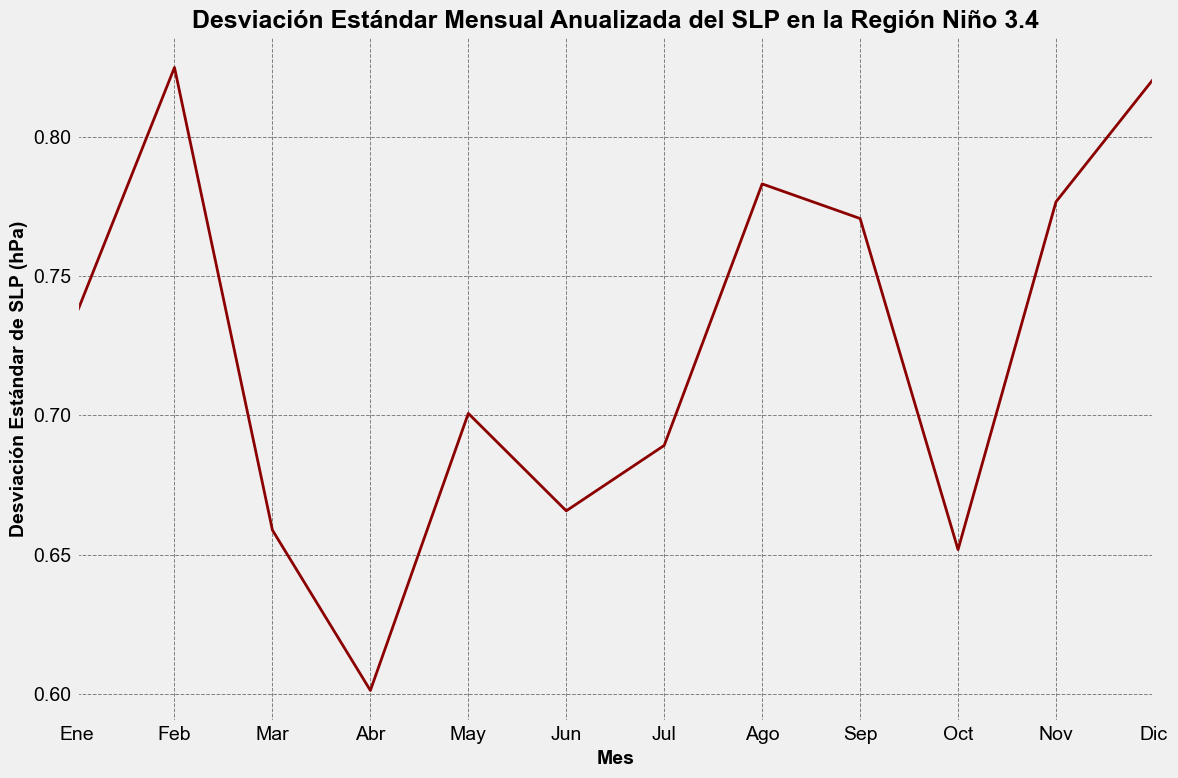

In [55]:
#Desviación estandar mensual anualizada


# Calcular la desviación estándar mensual anualizada
slp_monthly_std_anualizada = slp_df.groupby(slp_df.index.month).std()

# Graficar la desviación estándar mensual anualizada
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro estilo disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la desviación estándar mensual anualizada
ax.plot(slp_monthly_std_anualizada.index, slp_monthly_std_anualizada['SLP'], color='darkred', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Desviación Estándar Mensual Anualizada del SLP en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Desviación Estándar de SLP (hPa)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

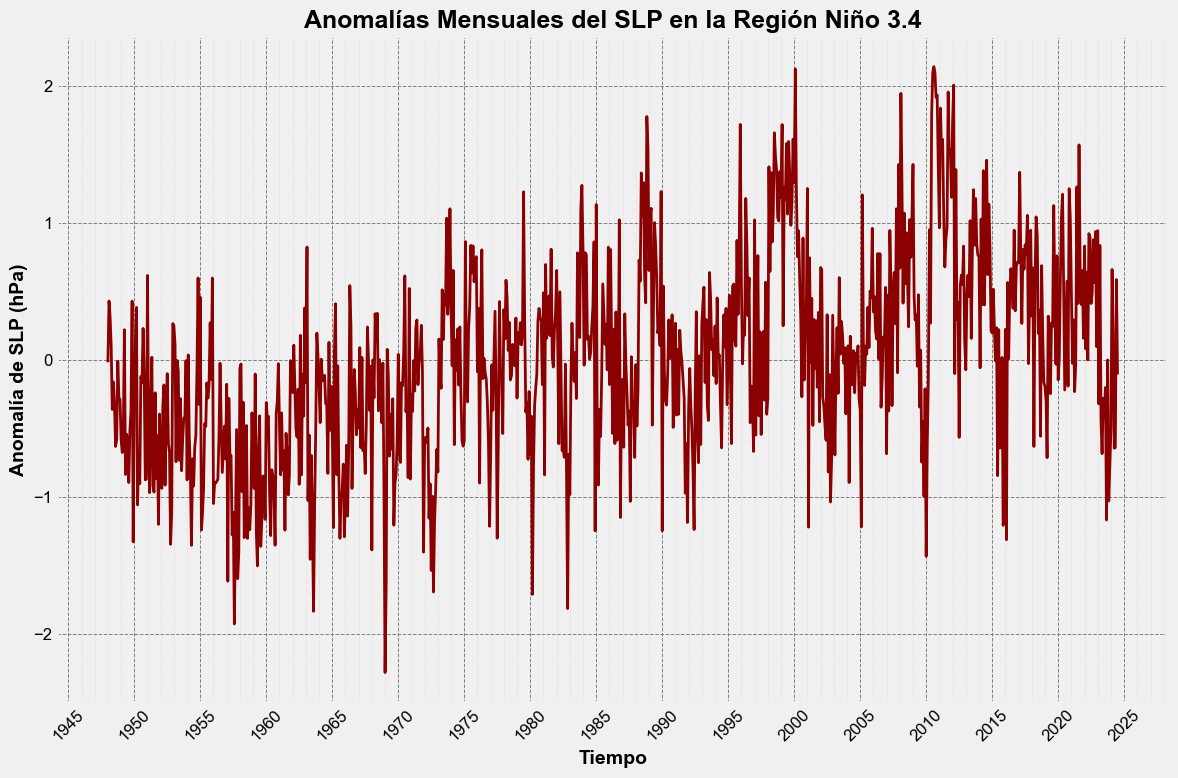

In [56]:
#Anomalia Mensual

# Calcular las anomalías mensuales
slp_anomalies = slp_df.copy()
slp_anomalies['Anomalía'] = slp_df['SLP'] - slp_anomalies.index.month.map(slp_monthly_mean_anualizada['SLP'])

# Graficar las anomalías mensuales
plt.style.use('fivethirtyeight')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar las anomalías mensuales
ax.plot(slp_anomalies.index, slp_anomalies['Anomalía'], color='darkred', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Anomalías Mensuales del SLP en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Anomalía de SLP (hPa)', fontsize=14, weight='bold')

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año y mes para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

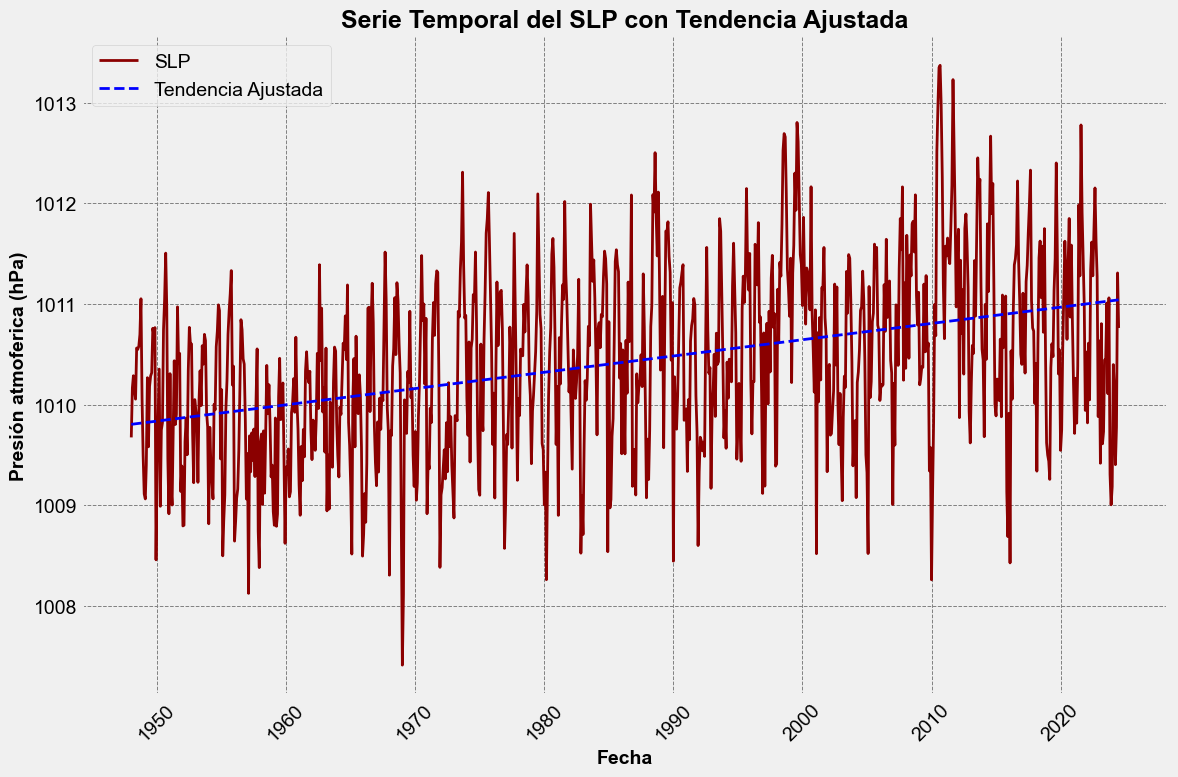

                            OLS Regression Results                            
Dep. Variable:                    SLP   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     165.1
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           7.16e-35
Time:                        12:22:53   Log-Likelihood:                -1146.6
No. Observations:                 919   AIC:                             2297.
Df Residuals:                     917   BIC:                             2307.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1009.8049      0.056   1.82e+04      0.0

In [57]:
#Analisis de tendencia

# Ajustar un modelo de regresión lineal para capturar la tendencia
slp_df['Time'] = np.arange(len(slp_df))
X = sm.add_constant(slp_df['Time'])
model = sm.OLS(slp_df['SLP'], X).fit()

# Obtener los valores ajustados y residuales
slp_df['Trend'] = model.predict(X)
slp_df['Residuals'] = slp_df['SLP'] - slp_df['Trend']

# Graficar la serie temporal y la tendencia ajustada
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(slp_df.index, slp_df['SLP'], color='darkred', linewidth=2, label='SLP')
ax.plot(slp_df.index, slp_df['Trend'], color='blue', linestyle='--', linewidth=2, label='Tendencia Ajustada')
ax.set_title('Serie Temporal del SLP con Tendencia Ajustada', fontsize=18, weight='bold')
ax.set_xlabel('Fecha', fontsize=14, weight='bold')
ax.set_ylabel('Presión atmoferica (hPa)', fontsize=14, weight='bold')
ax.legend()
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Imprimir el resumen del modelo de regresión
print(model.summary())

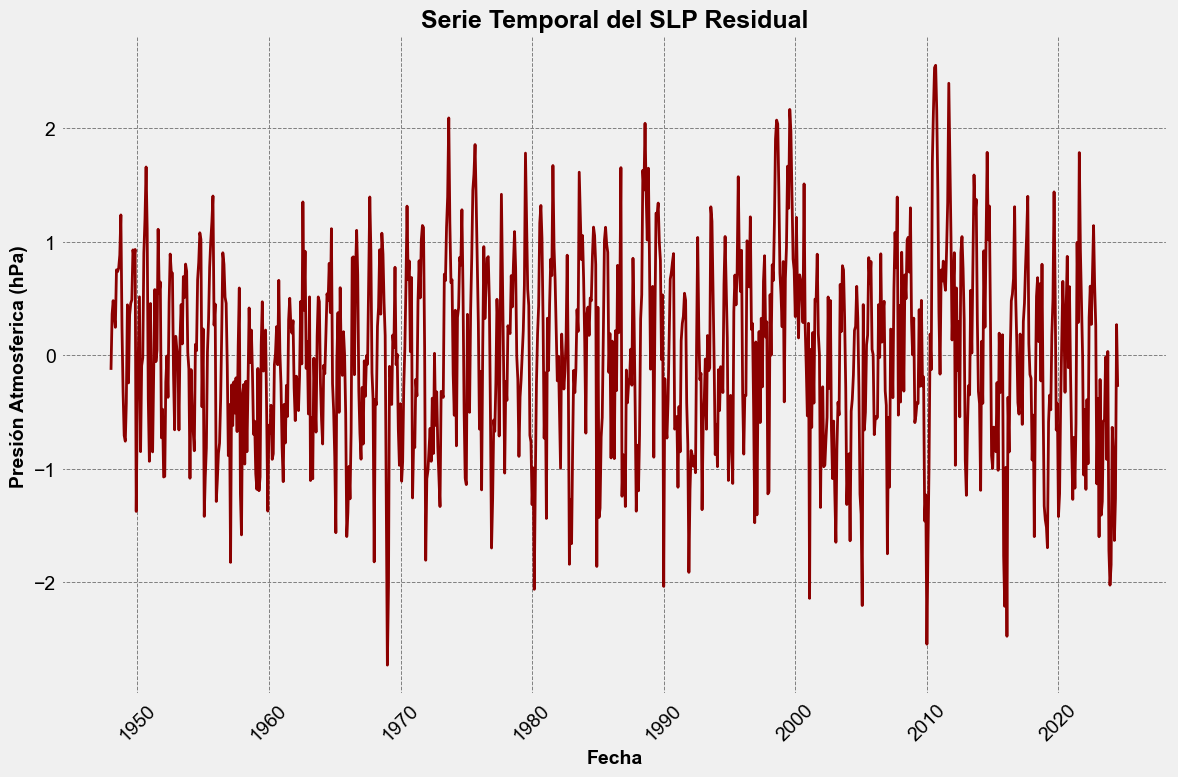

In [58]:
#Serie de tiempo residual
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(slp_df.index, slp_df['Residuals'], color='darkred', linewidth=2, label='SST')
ax.set_title('Serie Temporal del SLP Residual', fontsize=18, weight='bold')
ax.set_xlabel('Fecha', fontsize=14, weight='bold')
ax.set_ylabel('Presión Atmosferica (hPa)', fontsize=14, weight='bold')
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

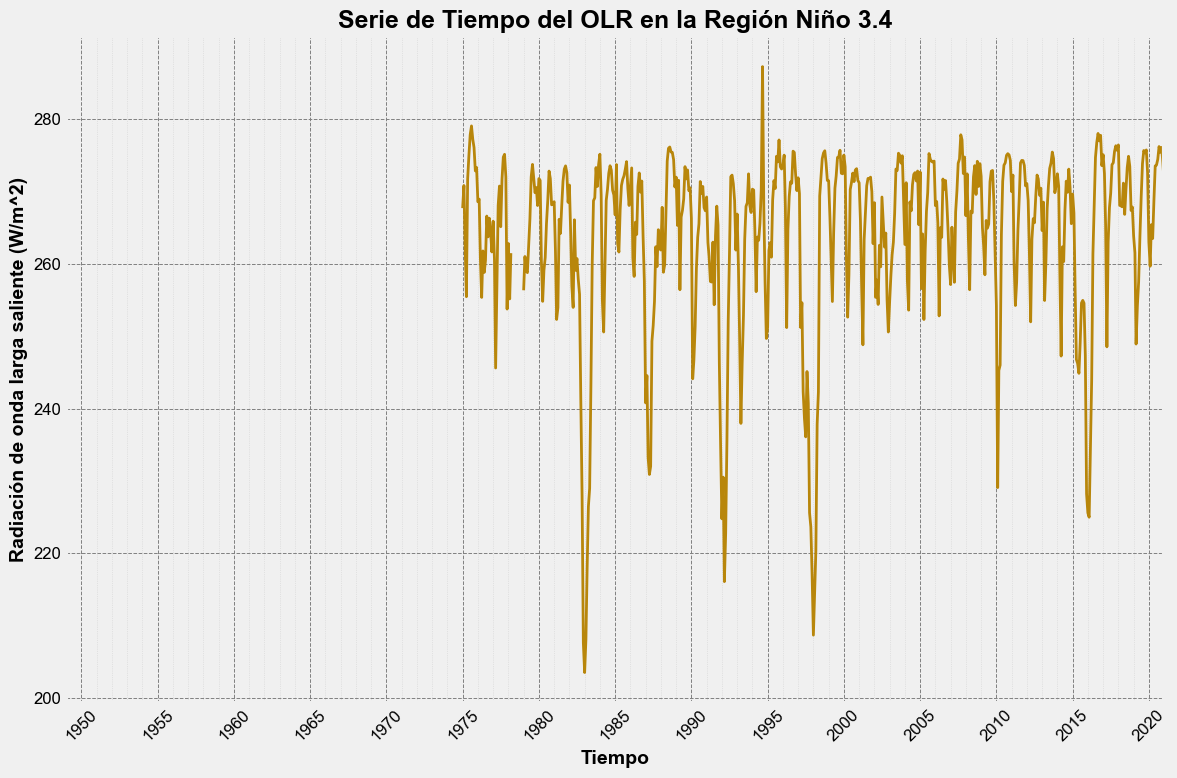

In [82]:
#OLR
plt.rc('font', family='Arial', size=10)

# Recortamos la gráfica de slp a la región requerida por nosotros
df_olr_nino3_4 = df_olr.sel(lat=slice(5, -5), lon=slice(190, 240))  # DataArray de la región Niño 3.4
olr = df_olr_nino3_4['olr']
# Calcular el promedio sobre las dimensiones de latitud y longitud
olr_mean = olr.mean(dim=['lat', 'lon'])

# Graficar la serie de tiempo con un estilo alternativo
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo del promedio
ax.plot(olr_mean['time'], olr_mean, color='#B8860B', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Serie de Tiempo del OLR en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Radiación de onda larga saliente (W/m^2)', fontsize=14, weight='bold')

# Asegurar que el eje X cubra el rango de fechas desde 1951 hasta 2010
ax.set_xlim(olr_mean['time'].min().values, olr_mean['time'].max().values)

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Ajustar los límites del eje Y si es necesario
ax.set_xlim(np.datetime64('1949-01-01'), np.datetime64('2020-12-31'))

# Mostrar el gráfico
plt.tight_layout()
plt.show()


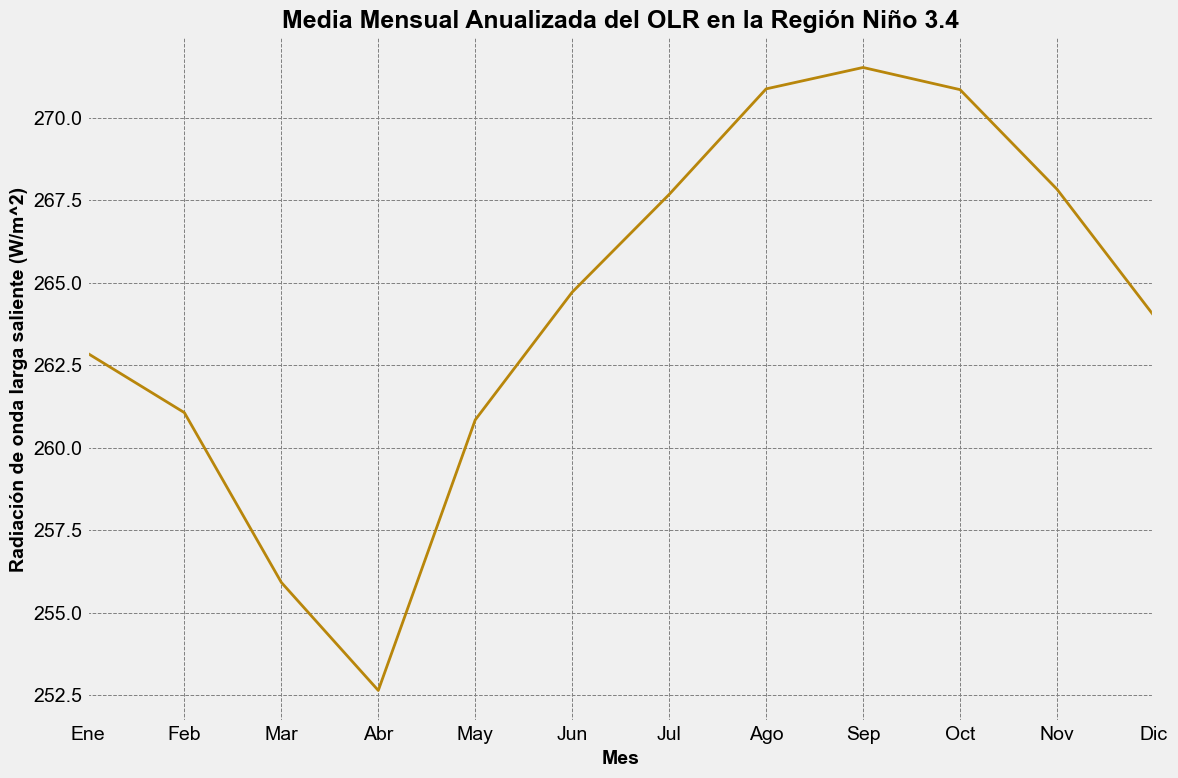

In [60]:
#Media mensual anualizada

#Crear un DataFrame de pandas para manejar la serie temporal
olr_df = pd.DataFrame({'OLR': olr_mean.values}, index=olr_mean['time'].values)

# Calcular la media mensual anualizada
olr_monthly_mean = olr_df.resample('M').mean()  # Media mensual
olr_monthly_mean_anualizada = olr_monthly_mean.groupby(olr_monthly_mean.index.month).mean()

# Graficar la media mensual anualizada
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo de la media mensual anualizada
ax.plot(olr_monthly_mean_anualizada.index, olr_monthly_mean_anualizada['OLR'], color='#B8860B', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Media Mensual Anualizada del OLR en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Radiación de onda larga saliente (W/m^2)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

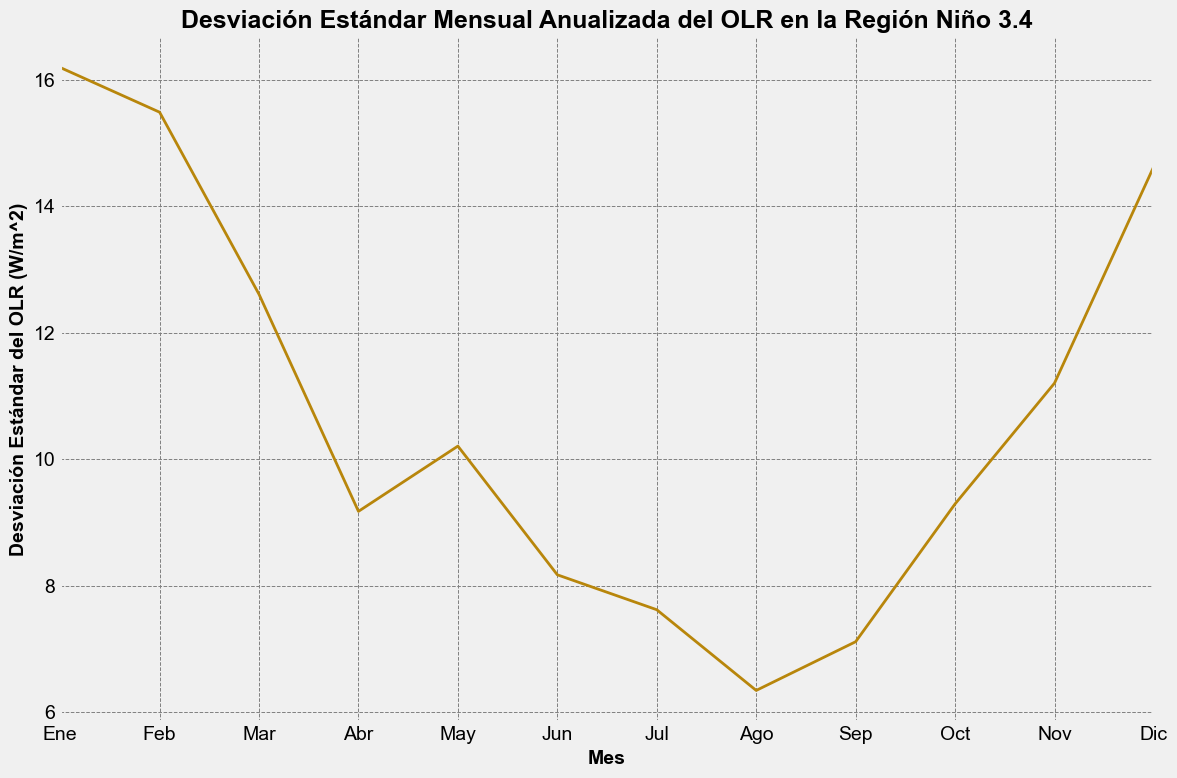

In [61]:
#Desviación estandar mensual anualizada


# Calcular la desviación estándar mensual anualizada
olr_monthly_std_anualizada = olr_df.groupby(olr_df.index.month).std()

# Graficar la desviación estándar mensual anualizada
plt.style.use('fivethirtyeight') 

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la desviación estándar mensual anualizada
ax.plot(olr_monthly_std_anualizada.index, olr_monthly_std_anualizada['OLR'], color='#B8860B', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Desviación Estándar Mensual Anualizada del OLR en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Desviación Estándar del OLR (W/m^2)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

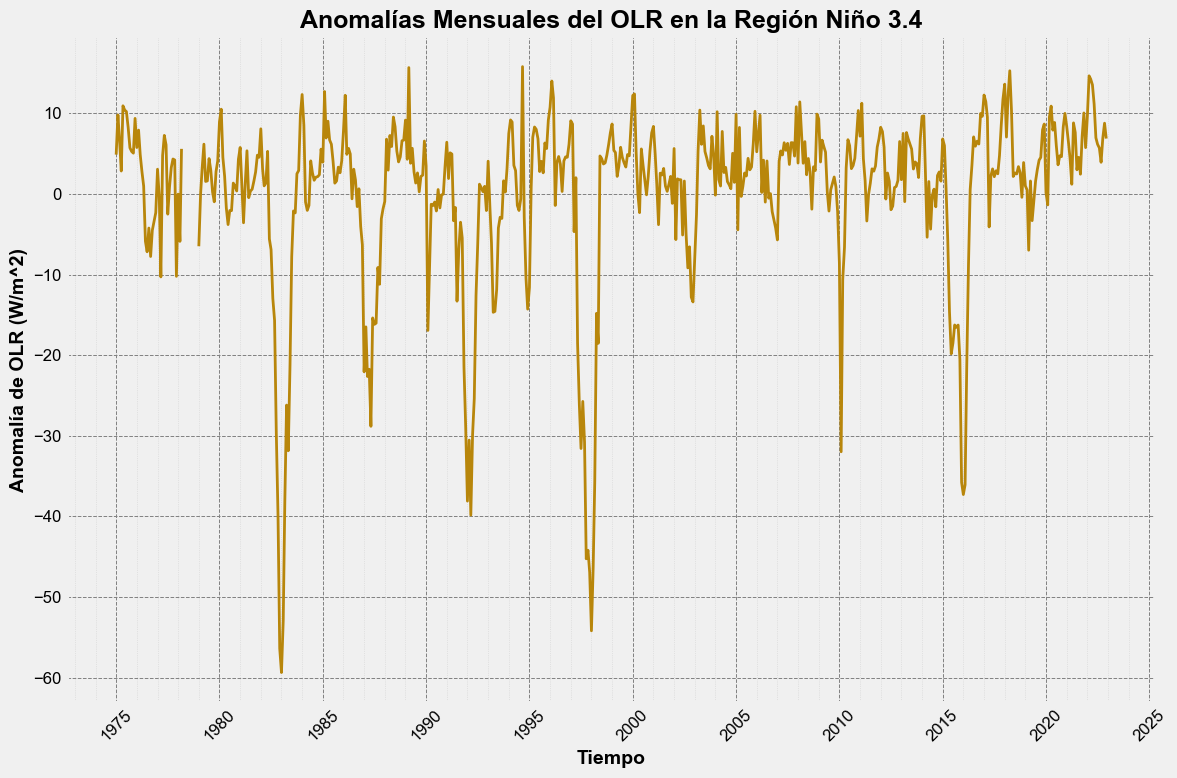

In [62]:
#Anomalia Mensual

# Calcular las anomalías mensuales
olr_anomalies = olr_df.copy()
olr_anomalies['Anomalía'] = olr_df['OLR'] - olr_anomalies.index.month.map(olr_monthly_mean_anualizada['OLR'])

# Graficar las anomalías mensuales
plt.style.use('fivethirtyeight')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar las anomalías mensuales
ax.plot(olr_anomalies.index, olr_anomalies['Anomalía'], color='#B8860B', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Anomalías Mensuales del OLR en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Anomalía de OLR (W/m^2)', fontsize=14, weight='bold')

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año y mes para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

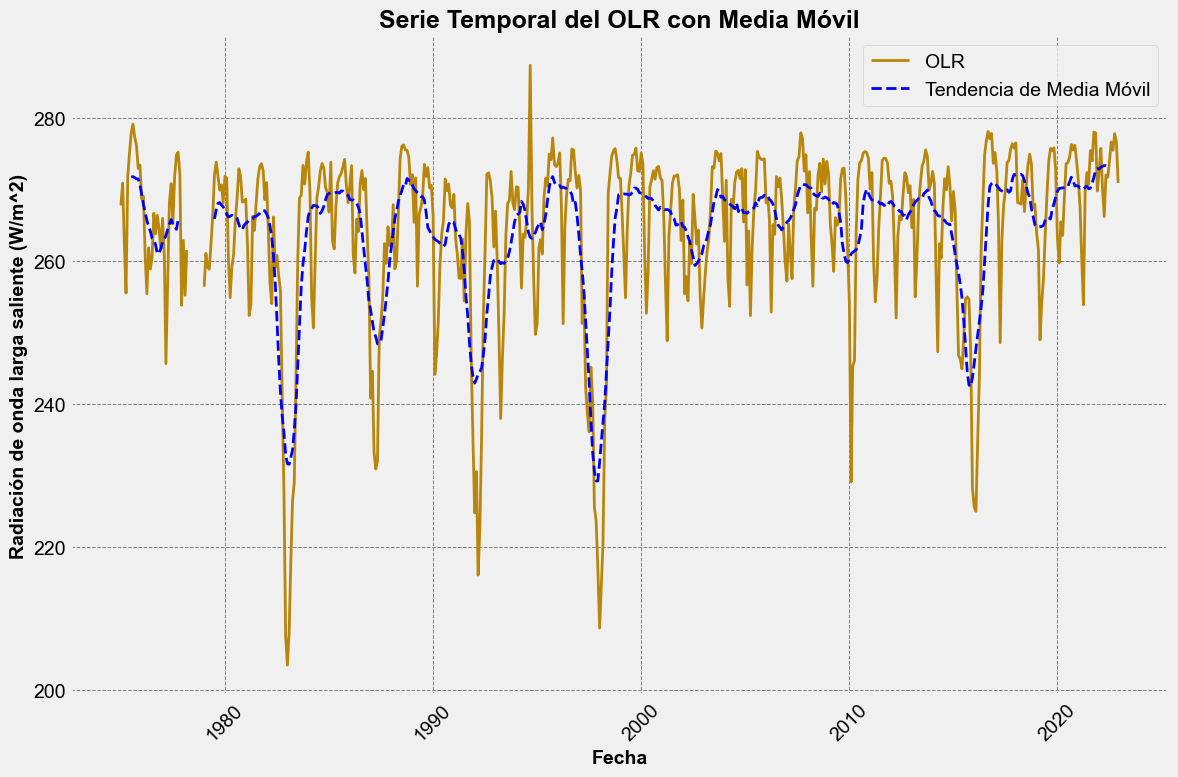

In [63]:
#Analisis de tendencia

# Calcular la media móvil (rolling mean) con una ventana de 12 meses
olr_df['Trend'] = olr_df['OLR'].rolling(window=12, center=True).mean()

# Calcular los residuales restando la tendencia de los valores originales
olr_df['Residuals'] = olr_df['OLR'] - olr_df['Trend']

# Graficar la serie temporal y la tendencia ajustada
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(olr_df.index, olr_df['OLR'], color='#B8860B', linewidth=2, label='OLR')
ax.plot(olr_df.index, olr_df['Trend'], color='blue', linestyle='--', linewidth=2, label='Tendencia de Media Móvil')
ax.set_title('Serie Temporal del OLR con Media Móvil', fontsize=18, weight='bold')
ax.set_xlabel('Fecha', fontsize=14, weight='bold')
ax.set_ylabel('Radiación de onda larga saliente (W/m^2)', fontsize=14, weight='bold')
ax.legend()
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

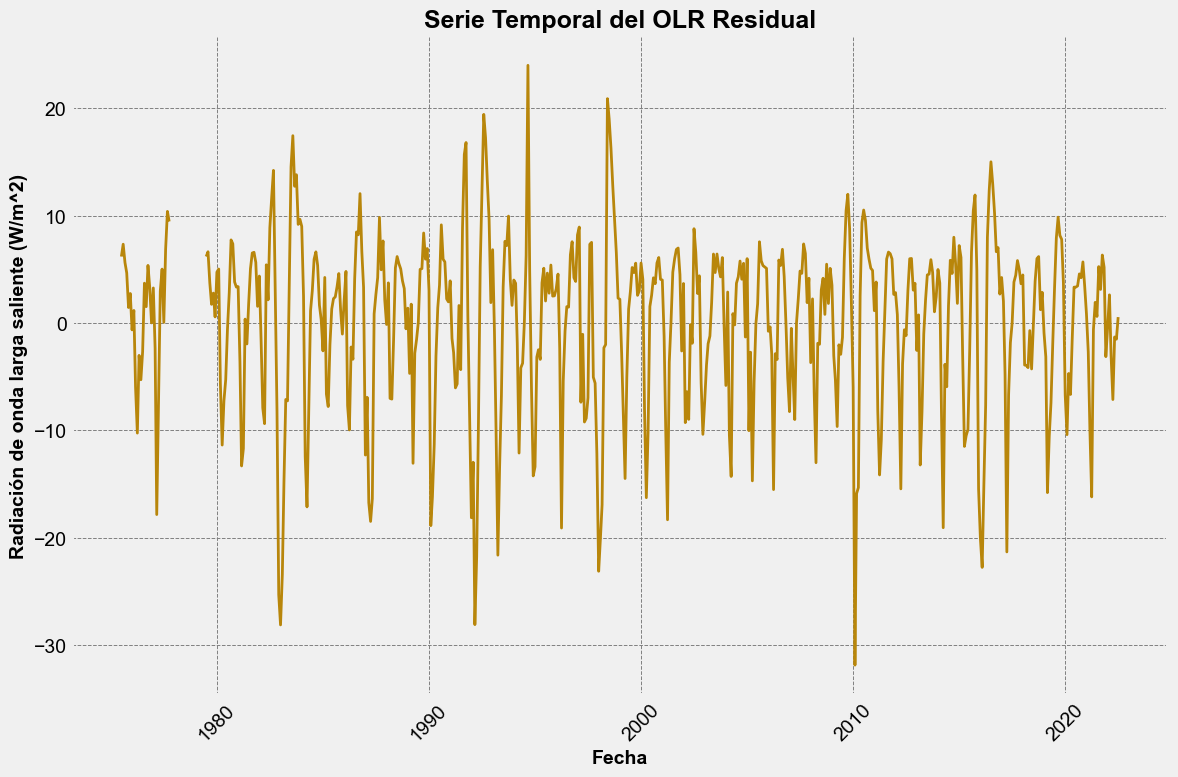

In [64]:
#Serie de tiempo residual
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(olr_df.index, olr_df['Residuals'], color='#B8860B', linewidth=2, label='OLR')
ax.set_title('Serie Temporal del OLR Residual', fontsize=18, weight='bold')
ax.set_xlabel('Fecha', fontsize=14, weight='bold')
ax.set_ylabel('Radiación de onda larga saliente (W/m^2)', fontsize=14, weight='bold')
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

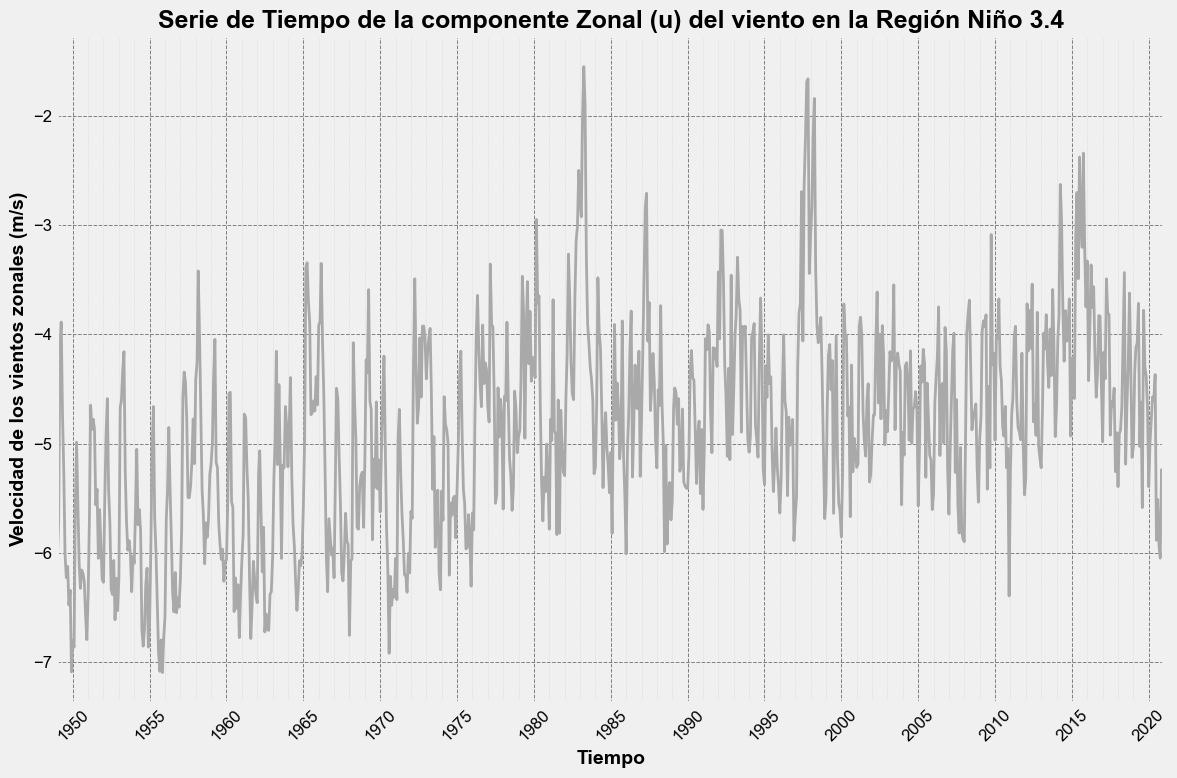

In [65]:
#Vientos Zonales (10 metros)

# Recortamos la gráfica de slp a la región requerida por nosotros
df_u_winds_nino3_4 = df_u_winds.sel(lat=slice(5, -5), lon=slice(190, 240))  # DataArray de la región Niño 3.4
u_winds = df_u_winds_nino3_4['uwnd']
# Calcular el promedio sobre las dimensiones de latitud y longitud
u_winds_mean = u_winds.mean(dim=['lat', 'lon'])

# Graficar la serie de tiempo con un estilo alternativo
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo del promedio
ax.plot(u_winds_mean['time'], u_winds_mean, color='#A9A9A9', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Serie de Tiempo de la componente Zonal (u) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Velocidad de los vientos zonales (m/s)', fontsize=14, weight='bold')

# Asegurar que el eje X cubra el rango de fechas desde 1951 hasta 2010
ax.set_xlim(u_winds_mean['time'].min().values, u_winds_mean['time'].max().values)

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Ajustar los límites del eje Y si es necesario
ax.set_xlim(np.datetime64('1949-01-01'), np.datetime64('2020-12-31'))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

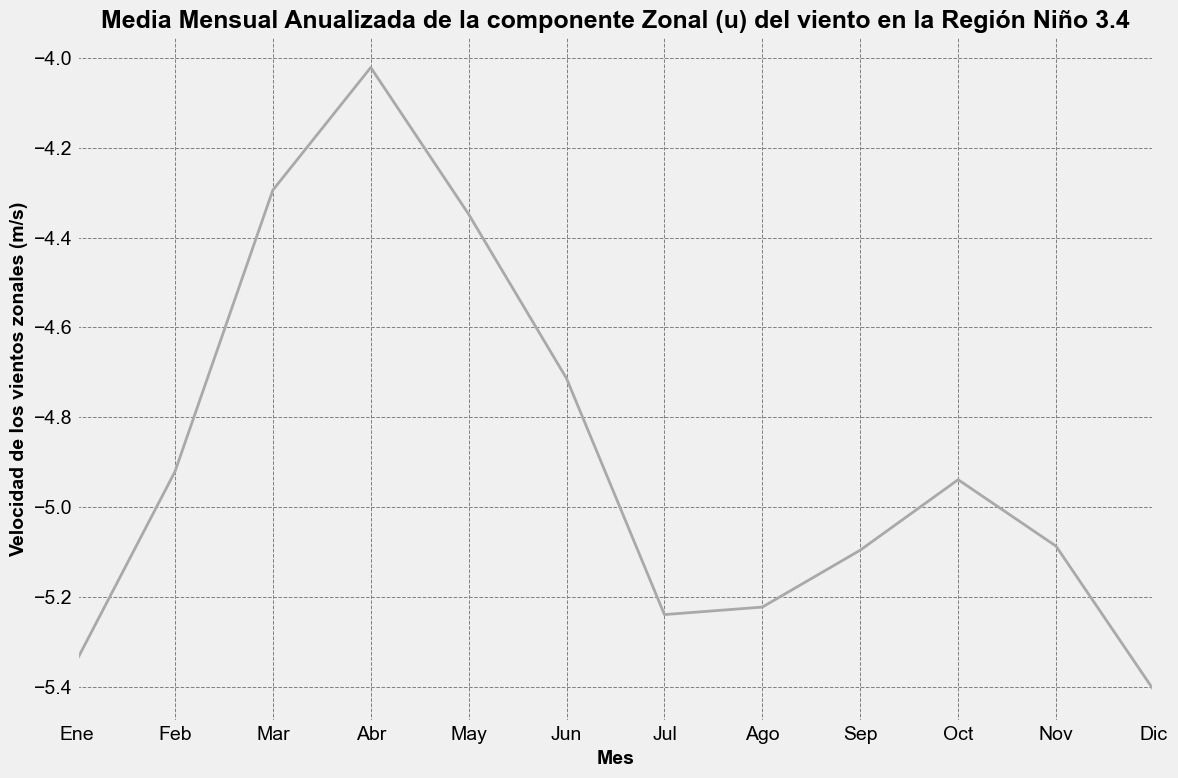

In [66]:
#Media mensual anualizada

#Crear un DataFrame de pandas para manejar la serie temporal
u_winds_df = pd.DataFrame({'u_winds': u_winds_mean.values}, index=u_winds_mean['time'].values)

# Calcular la media mensual anualizada
u_winds_monthly_mean = u_winds_df.resample('M').mean()  # Media mensual
u_winds_monthly_mean_anualizada = u_winds_monthly_mean.groupby(u_winds_monthly_mean.index.month).mean()


# Graficar la media mensual anualizada
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo de la media mensual anualizada
ax.plot(u_winds_monthly_mean_anualizada.index, u_winds_monthly_mean_anualizada['u_winds'], color='#A9A9A9', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Media Mensual Anualizada de la componente Zonal (u) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Velocidad de los vientos zonales (m/s)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

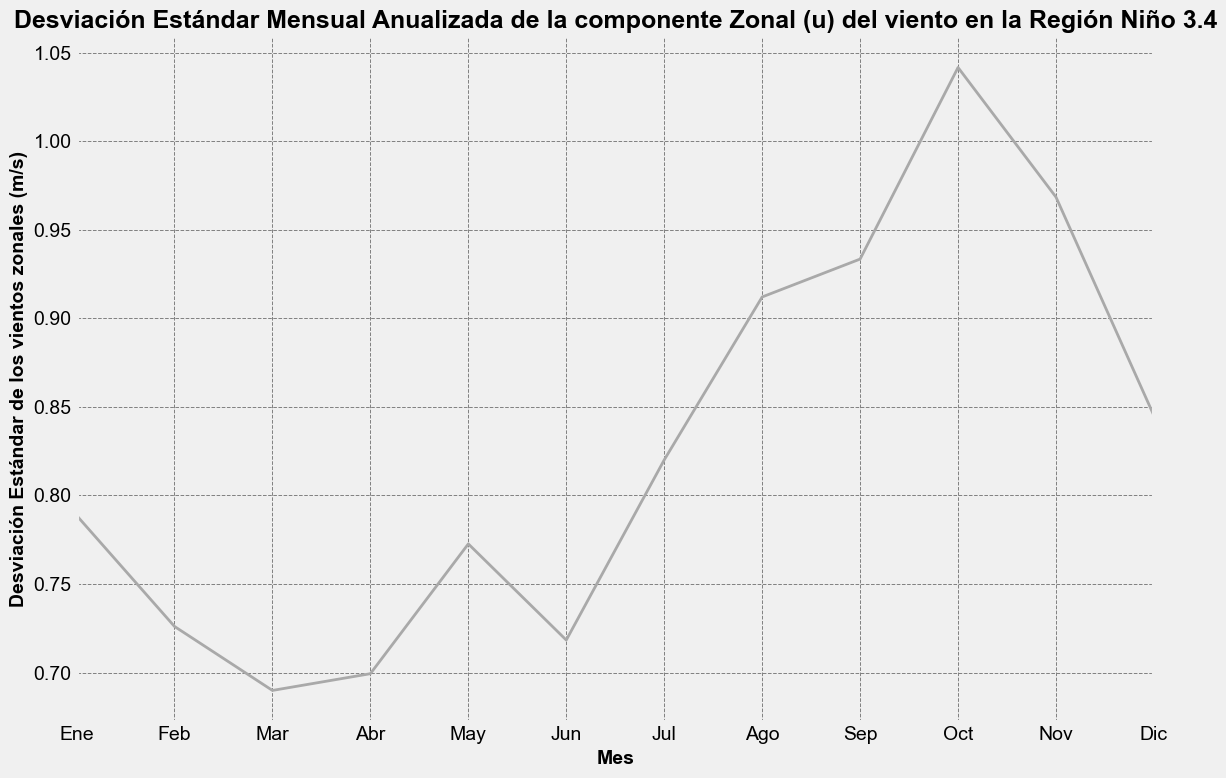

In [67]:
#Desviación estandar mensual anualizada


# Calcular la desviación estándar mensual anualizada
u_winds_monthly_std_anualizada = u_winds_df.groupby(u_winds_df.index.month).std()


# Graficar la desviación estándar mensual anualizada
plt.style.use('fivethirtyeight') 

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la desviación estándar mensual anualizada
ax.plot(u_winds_monthly_std_anualizada.index, u_winds_monthly_std_anualizada['u_winds'], color='#A9A9A9', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Desviación Estándar Mensual Anualizada de la componente Zonal (u) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Desviación Estándar de los vientos zonales (m/s)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

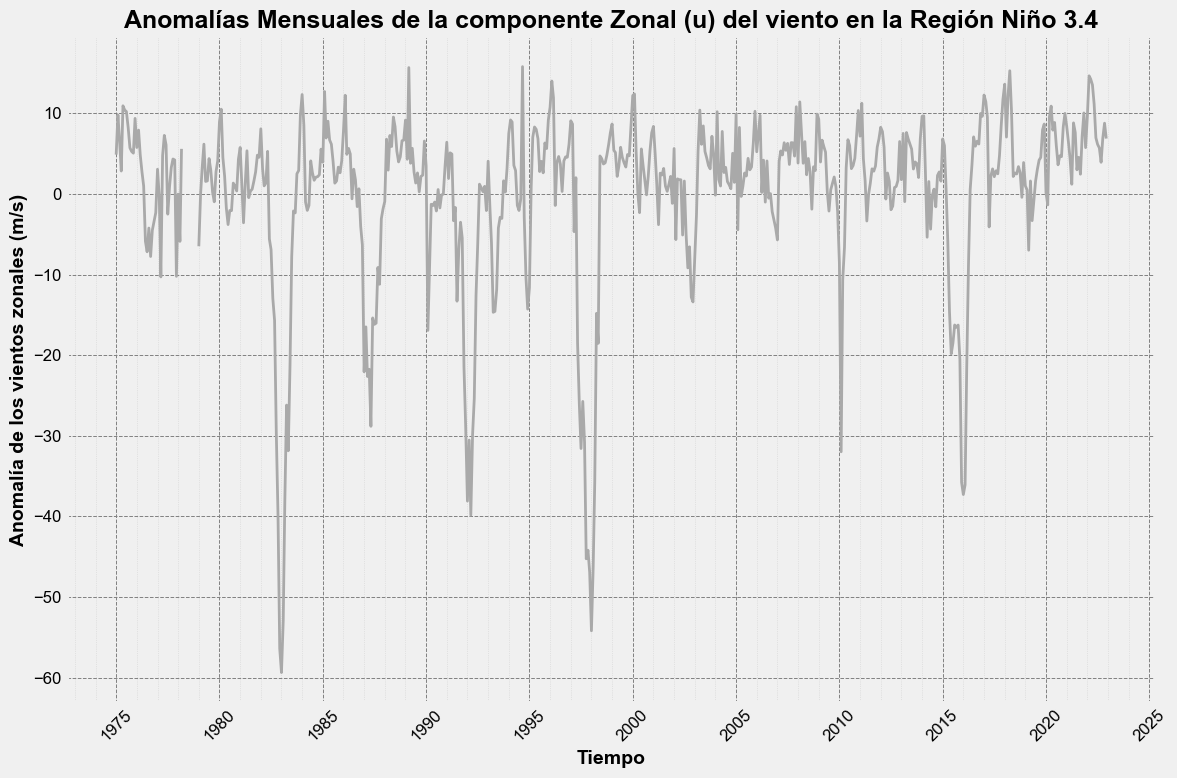

In [68]:
#Anomalia Mensual



# Calcular las anomalías mensuales
u_winds_anomalies = u_winds_df.copy()
u_winds_anomalies['Anomalía'] = u_winds_df['u_winds'] - u_winds_anomalies.index.month.map(u_winds_monthly_mean_anualizada['u_winds'])


# Graficar las anomalías mensuales
plt.style.use('fivethirtyeight')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar las anomalías mensuales
ax.plot(olr_anomalies.index, olr_anomalies['Anomalía'], color='#A9A9A9', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Anomalías Mensuales de la componente Zonal (u) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Anomalía de los vientos zonales (m/s)', fontsize=14, weight='bold')

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año y mes para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

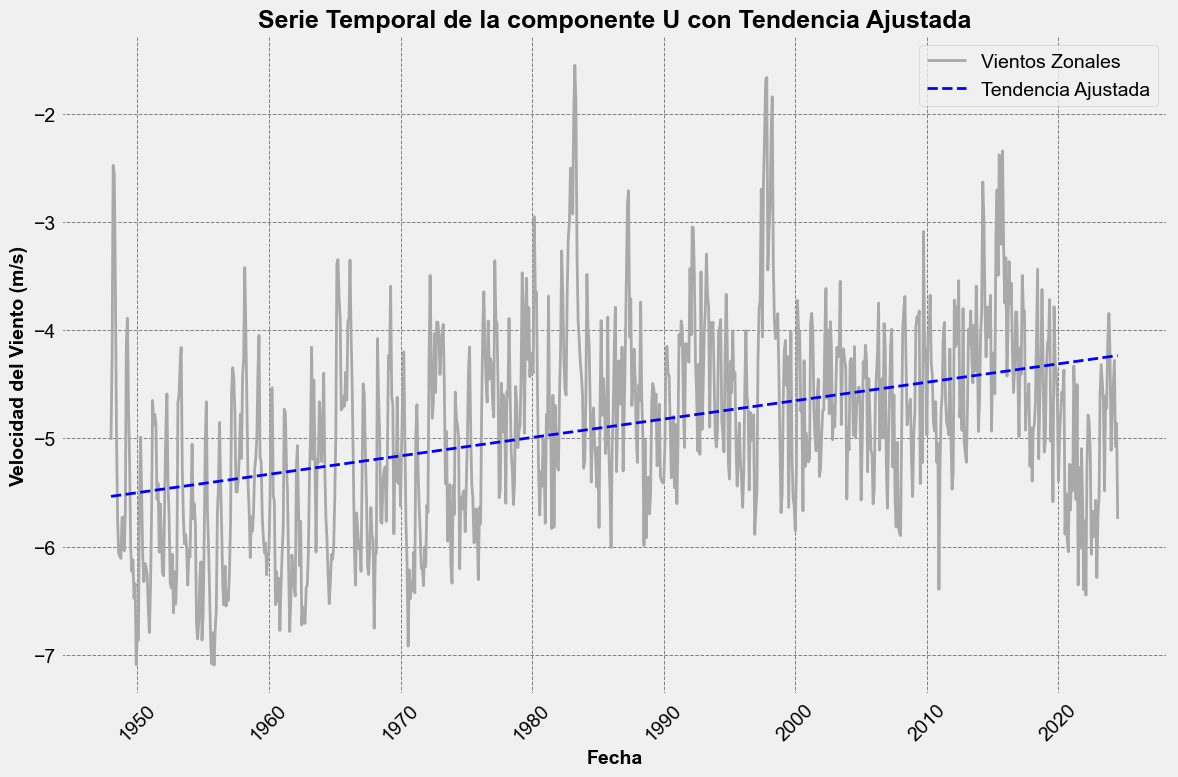

                            OLS Regression Results                            
Dep. Variable:                u_winds   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     178.3
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           2.74e-37
Time:                        12:22:59   Log-Likelihood:                -1158.6
No. Observations:                 919   AIC:                             2321.
Df Residuals:                     917   BIC:                             2331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5353      0.056    -98.263      0.0

In [69]:
#Analisis de tendencia

# Ajustar un modelo de regresión lineal para capturar la tendencia
u_winds_df['Time'] = np.arange(len(u_winds_df))
X = sm.add_constant(u_winds_df['Time'])
model = sm.OLS(u_winds_df['u_winds'], X).fit()

# Obtener los valores ajustados y residuales
u_winds_df['Trend'] = model.predict(X)
u_winds_df['Residuals'] = u_winds_df['u_winds'] - u_winds_df['Trend']

# Graficar la serie temporal y la tendencia ajustada
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(u_winds_df.index, u_winds_df['u_winds'], color='#A9A9A9', linewidth=2, label='Vientos Zonales')
ax.plot(u_winds_df.index, u_winds_df['Trend'], color='blue', linestyle='--', linewidth=2, label='Tendencia Ajustada')
ax.set_title('Serie Temporal de la componente U con Tendencia Ajustada', fontsize=18, weight='bold')
ax.set_xlabel('Fecha', fontsize=14, weight='bold')
ax.set_ylabel('Velocidad del Viento (m/s)', fontsize=14, weight='bold')
ax.legend()
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Imprimir el resumen del modelo de regresión
print(model.summary())

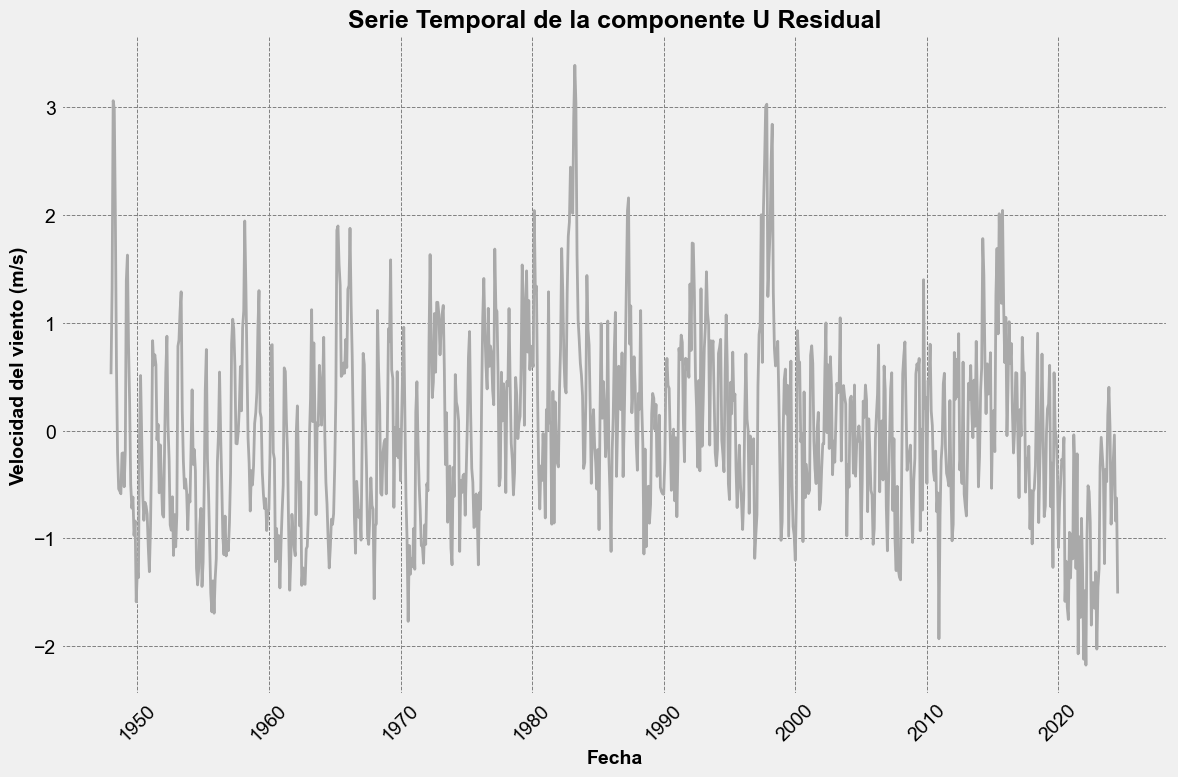

In [70]:
#Serie de tiempo residual
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(u_winds_df.index, u_winds_df['Residuals'], color='#A9A9A9', linewidth=2, label='u_winds')
ax.set_title('Serie Temporal de la componente U Residual', fontsize=18, weight='bold')
ax.set_xlabel('Fecha', fontsize=14, weight='bold')
ax.set_ylabel('Velocidad del viento (m/s)', fontsize=14, weight='bold')
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

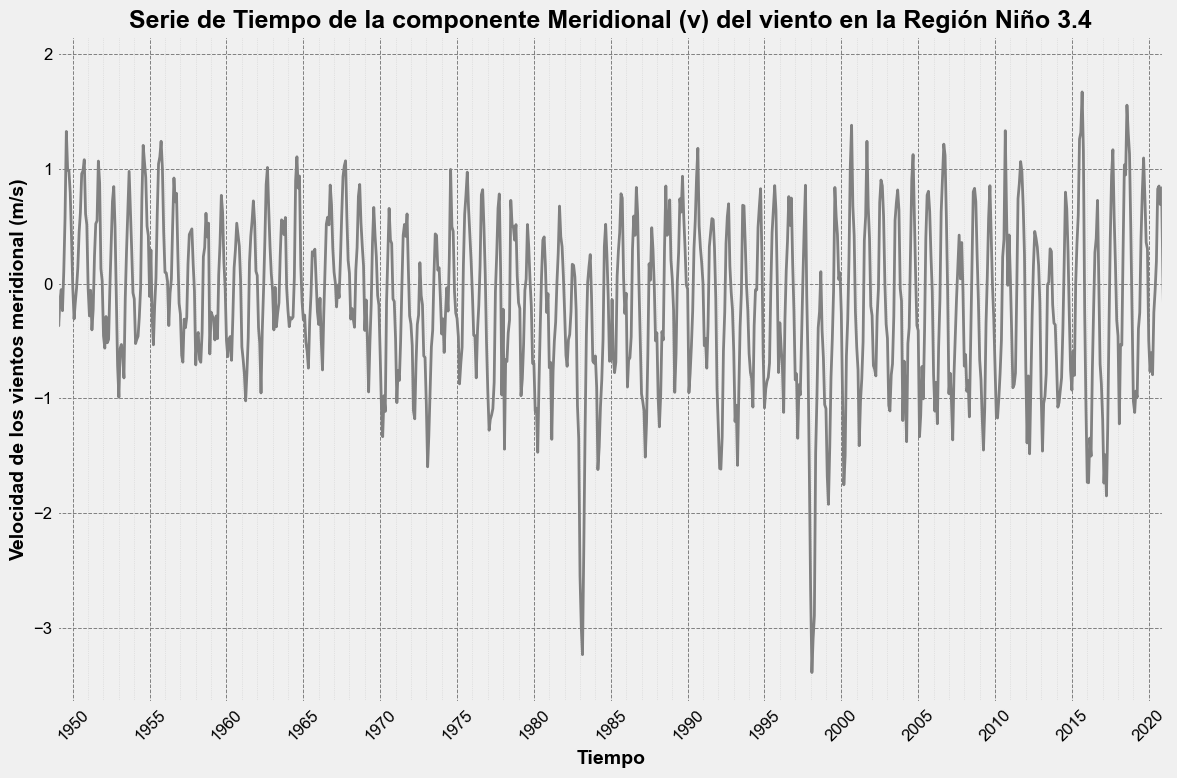

In [71]:
#Vientos meridoniales (10 mts)

plt.rc('font', family='Arial', size=10)


# Recortamos la gráfica de slp a la región requerida por nosotros
df_v_winds_nino3_4 = df_v_winds.sel(lat=slice(5, -5), lon=slice(190, 240))  # DataArray de la región Niño 3.4
v_winds = df_v_winds_nino3_4['vwnd']
# Calcular el promedio sobre las dimensiones de latitud y longitud
v_winds_mean = v_winds.mean(dim=['lat', 'lon'])

# Graficar la serie de tiempo con un estilo alternativo
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo del promedio
ax.plot(v_winds_mean['time'], v_winds_mean, color='#808080', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Serie de Tiempo de la componente Meridional (v) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Velocidad de los vientos meridional (m/s)', fontsize=14, weight='bold')

# Asegurar que el eje X cubra el rango de fechas desde 1951 hasta 2010
ax.set_xlim(v_winds_mean['time'].min().values, v_winds_mean['time'].max().values)

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Ajustar los límites del eje Y si es necesario
ax.set_xlim(np.datetime64('1949-01-01'), np.datetime64('2020-12-31'))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

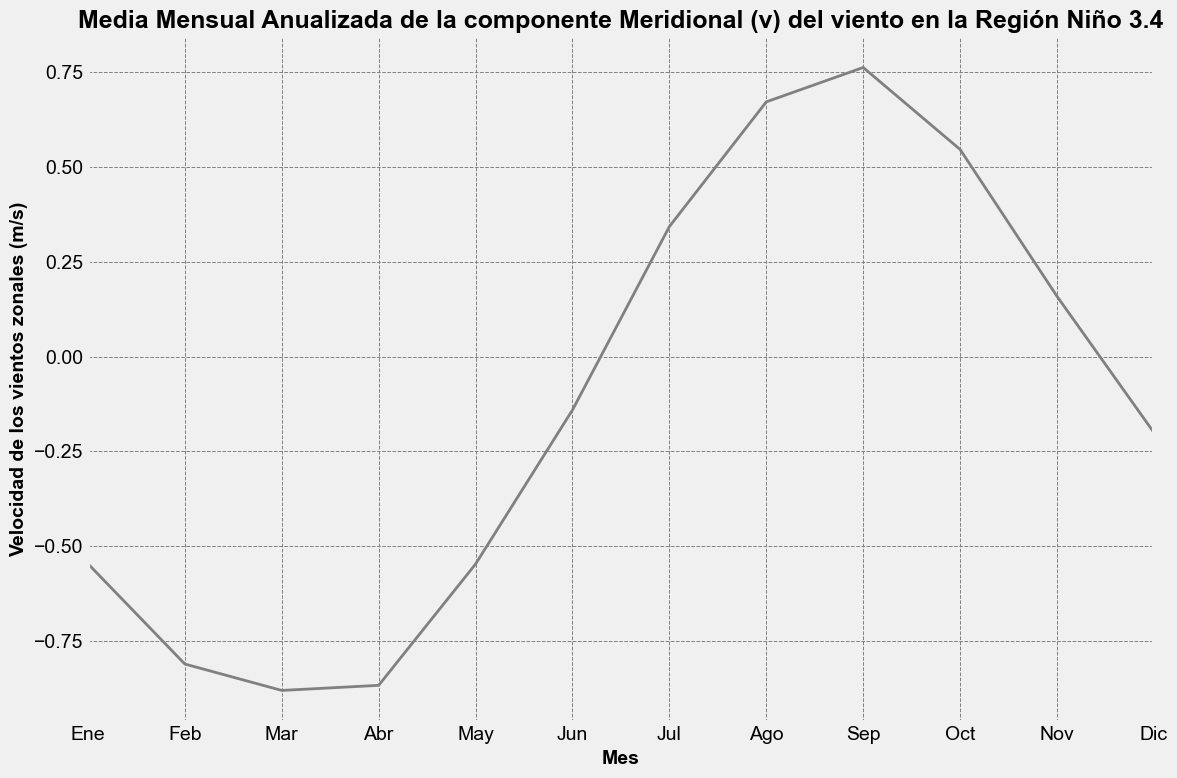

In [72]:
#Media mensual anualizada

#Crear un DataFrame de pandas para manejar la serie temporal
v_winds_df = pd.DataFrame({'v_winds': v_winds_mean.values}, index=v_winds_mean['time'].values)

# Calcular la media mensual anualizada
v_winds_monthly_mean = v_winds_df.resample('M').mean()  # Media mensual
v_winds_monthly_mean_anualizada = v_winds_monthly_mean.groupby(v_winds_monthly_mean.index.month).mean()


plt.rc('font', family='Arial', size=10)

# Graficar la media mensual anualizada
plt.style.use('fivethirtyeight')  


# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo de la media mensual anualizada
ax.plot(v_winds_monthly_mean_anualizada.index, v_winds_monthly_mean_anualizada['v_winds'], color='#808080', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Media Mensual Anualizada de la componente Meridional (v) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Velocidad de los vientos zonales (m/s)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

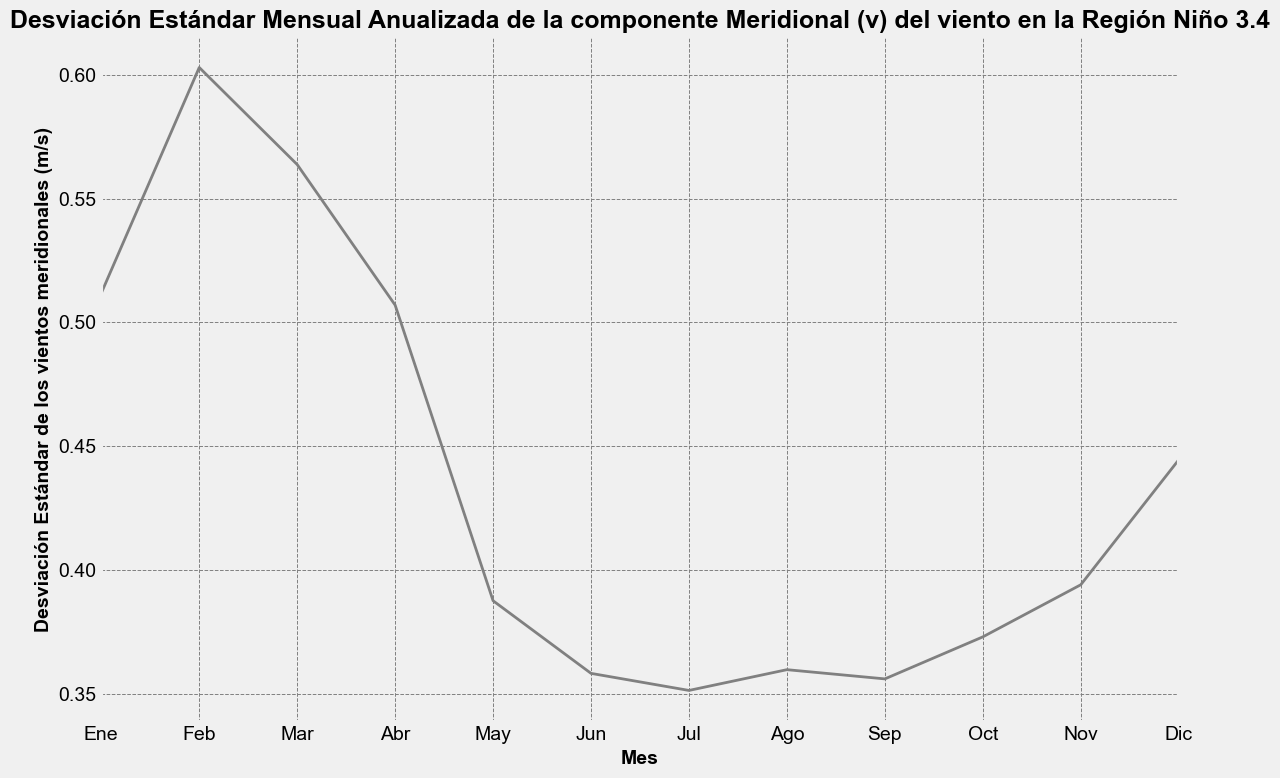

In [73]:
#Desviación estandar mensual anualizada


# Calcular la desviación estándar mensual anualizada
v_winds_monthly_std_anualizada = v_winds_df.groupby(v_winds_df.index.month).std()

plt.rc('font', family='Arial', size=10)

# Graficar la desviación estándar mensual anualizada
plt.style.use('fivethirtyeight') 

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la desviación estándar mensual anualizada
ax.plot(v_winds_monthly_std_anualizada.index, v_winds_monthly_std_anualizada['v_winds'], color='#808080', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Desviación Estándar Mensual Anualizada de la componente Meridional (v) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Mes', fontsize=14, weight='bold')
ax.set_ylabel('Desviación Estándar de los vientos meridionales (m/s)', fontsize=14, weight='bold')

# Ajustar el rango del eje X para mostrar los meses
ax.set_xlim(1, 12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

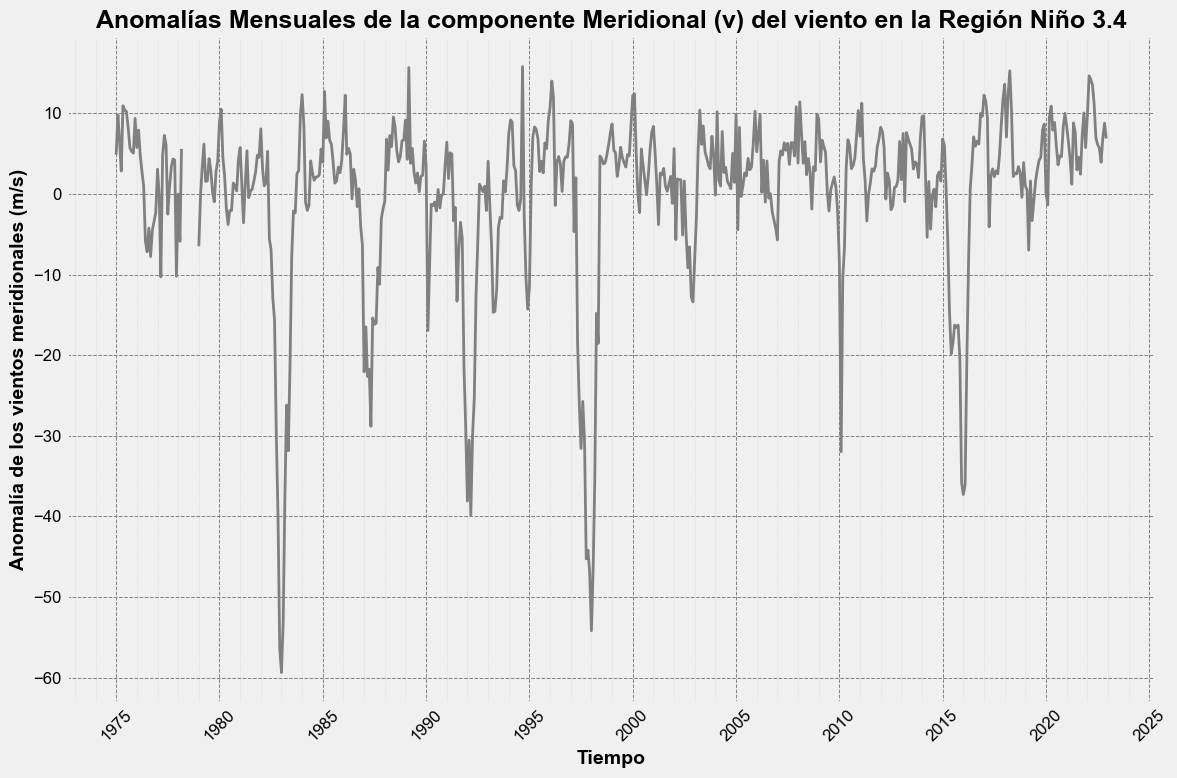

In [74]:
#Anomalia Mensual

# Calcular las anomalías mensuales
v_winds_anomalies = v_winds_df.copy()
v_winds_anomalies['Anomalía'] = v_winds_df['v_winds'] - v_winds_anomalies.index.month.map(v_winds_monthly_mean_anualizada['v_winds'])

plt.rc('font', family='Arial', size=10)

# Graficar las anomalías mensuales
plt.style.use('fivethirtyeight')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar las anomalías mensuales
ax.plot(olr_anomalies.index, olr_anomalies['Anomalía'], color='#808080', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Anomalías Mensuales de la componente Meridional (v) del viento en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Anomalía de los vientos meridionales (m/s)', fontsize=14, weight='bold')

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año y mes para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

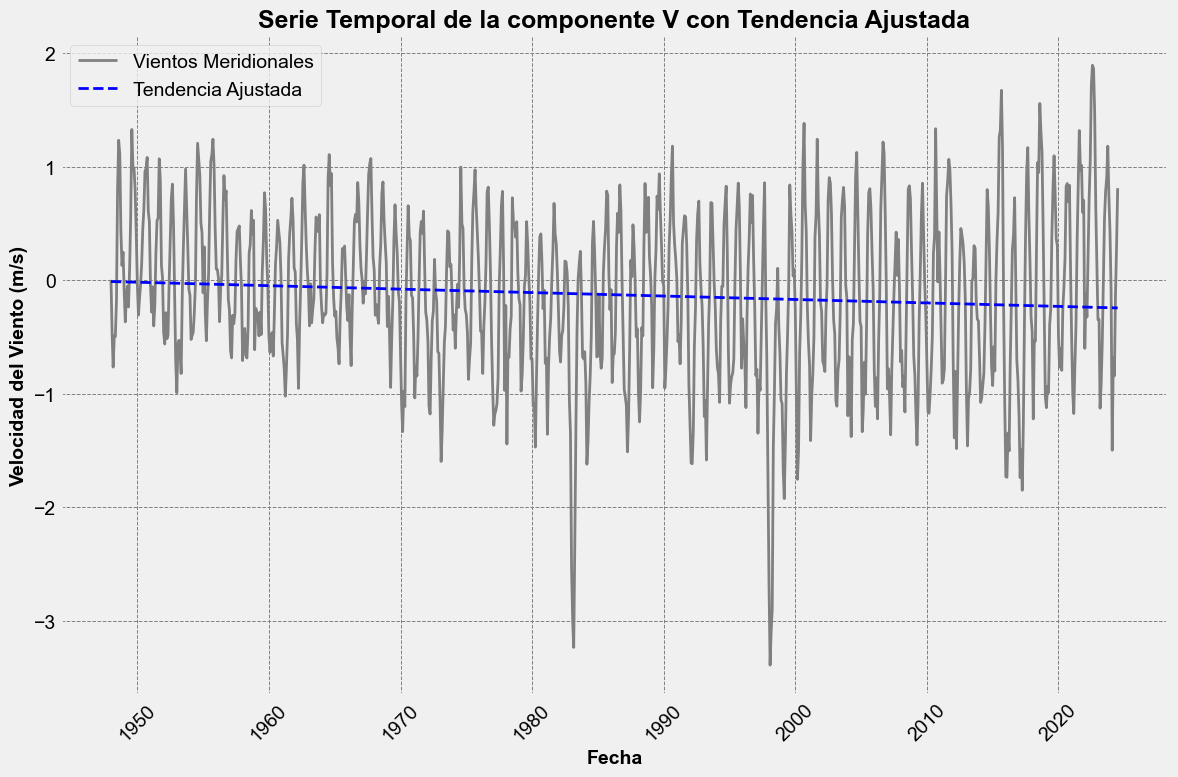

                            OLS Regression Results                            
Dep. Variable:                v_winds   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.771
Date:                Thu, 26 Sep 2024   Prob (F-statistic):            0.00542
Time:                        12:23:03   Log-Likelihood:                -1014.8
No. Observations:                 919   AIC:                             2034.
Df Residuals:                     917   BIC:                             2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0126      0.048     -0.261      0.7

In [75]:
#Analisis de tendencia

# Ajustar un modelo de regresión lineal para capturar la tendencia
v_winds_df['Time'] = np.arange(len(v_winds_df))
X = sm.add_constant(v_winds_df['Time'])
model = sm.OLS(v_winds_df['v_winds'], X).fit()

# Obtener los valores ajustados y residuales
v_winds_df['Trend'] = model.predict(X)
v_winds_df['Residuals'] = v_winds_df['v_winds'] - v_winds_df['Trend']

# Graficar la serie temporal y la tendencia ajustada
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(v_winds_df.index, v_winds_df['v_winds'], color='#808080', linewidth=2, label='Vientos Meridionales')
ax.plot(v_winds_df.index, v_winds_df['Trend'], color='blue', linestyle='--', linewidth=2, label='Tendencia Ajustada')
ax.set_title('Serie Temporal de la componente V con Tendencia Ajustada', fontsize=18, weight='bold')
ax.set_xlabel('Fecha', fontsize=14, weight='bold')
ax.set_ylabel('Velocidad del Viento (m/s)', fontsize=14, weight='bold')
ax.legend()
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Imprimir el resumen del modelo de regresión
print(model.summary())

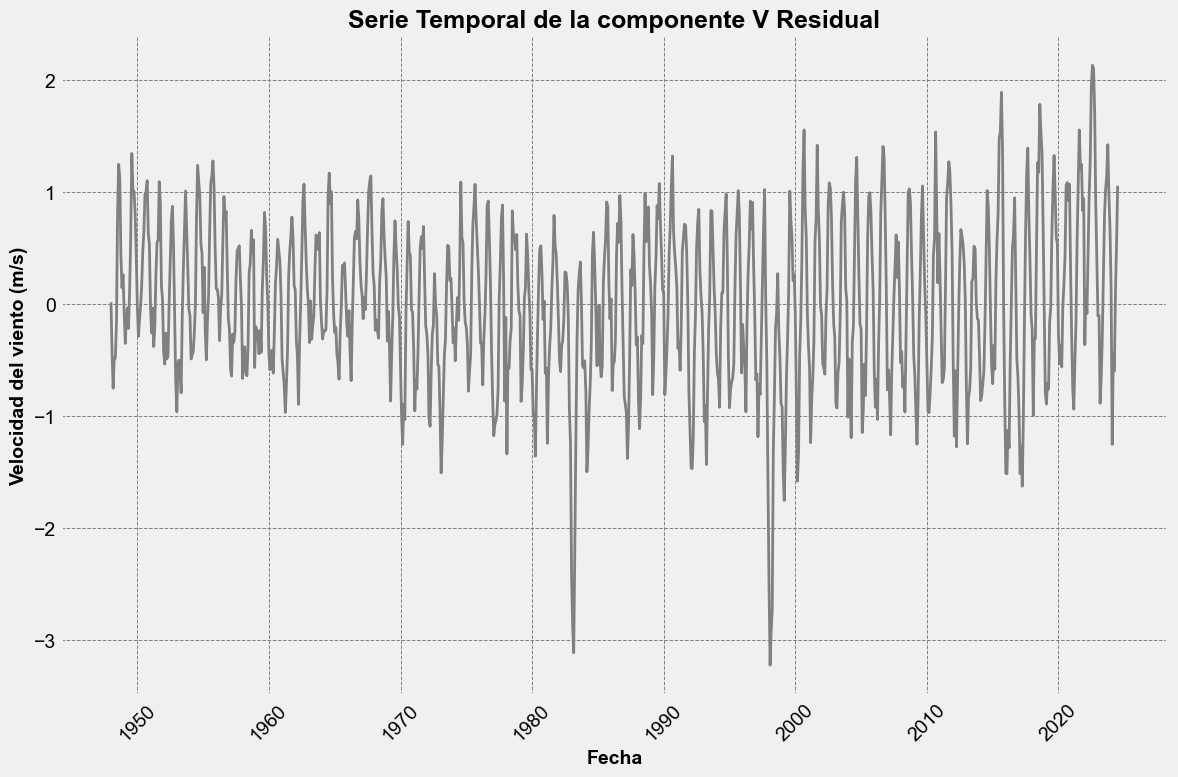

In [76]:
#Serie de tiempo residual
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(v_winds_df.index, v_winds_df['Residuals'], color='#808080', linewidth=2, label='u_winds')
ax.set_title('Serie Temporal de la componente V Residual', fontsize=18, weight='bold')
ax.set_xlabel('Fecha', fontsize=14, weight='bold')
ax.set_ylabel('Velocidad del viento (m/s)', fontsize=14, weight='bold')
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

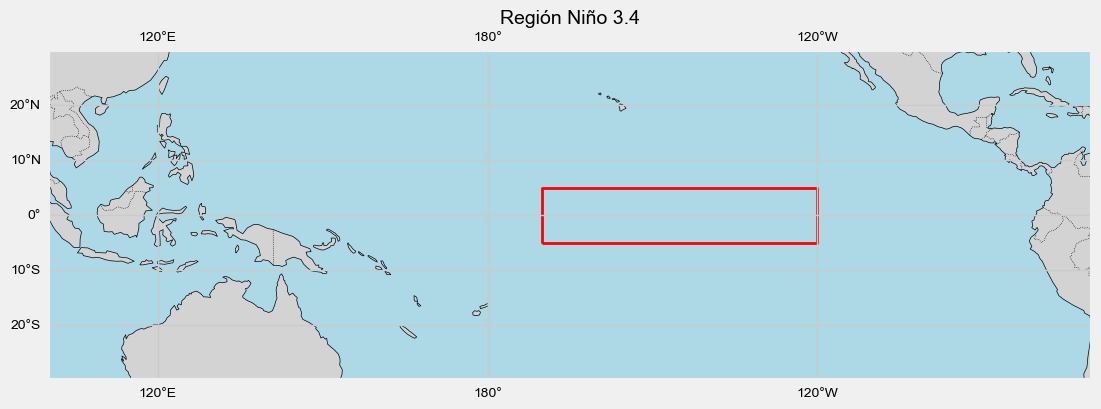

In [77]:
plt.rc('font', family='Arial', size=10)

# Crear una figura y un eje con proyección de mapa
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Agregar características de tierra y océanos
ax.add_feature(cfeature.LAND, color='lightgrey', edgecolor='black')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Dibujar un cuadro en la región Niño 3.4
latitudes = [-5, 5, 5, -5, -5]  # Coordenadas de latitud para Niño 3.4
longitudes = [190, 190, 240, 240, 190]  # Coordenadas de longitud para Niño 3.4 

ax.plot(longitudes, latitudes, color='red', linewidth=2, transform=ccrs.PlateCarree(), label='Región Niño 3.4')

# límites del mapa 
ax.set_extent([100, 290, -30, 30], crs=ccrs.PlateCarree())

# Agregar meridianos y paralelos
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Título y leyenda
ax.set_title("Región Niño 3.4", fontsize=14, )

# Mostrar el mapa
plt.show()

------------------------------------------------------------------------------
CORRELACIONES

El cálculo de la correlación que estamos haciendo es una correlación de Pearson para analizar cómo las dos variables, SST y SLP, se relacionan a lo largo del tiempo:

Correlación positiva (+1): Indica que cuando una variable (por ejemplo, la SST en la región Niño 3.4) aumenta, la otra (SLP en la misma o diferentes regiones) también tiende a aumentar. Esto podría ser una señal de que existe una conexión fuerte entre las anomalías de temperatura y la presión en esa área específica, lo cual es clave para entender el ENSO.

Correlación negativa (-1): Significa que cuando una variable aumenta, la otra disminuye. Por ejemplo, en un evento El Niño, la SST tiende a aumentar en la región Niño 3.4, pero la presión tiende a disminuir en otras regiones del Pacífico.

Correlación cercana a 0: Implica que no hay una relación clara entre las dos variables en esa área específica, lo cual puede significar que esa región no es relevante para el ENSO.

Al correlacionar la SST en la región Niño 3.4 con la SLP global, puedes identificar regiones donde los cambios en la presión están más vinculados con los cambios en la temperatura del océano, lo cual es clave para predecir el ENSO.

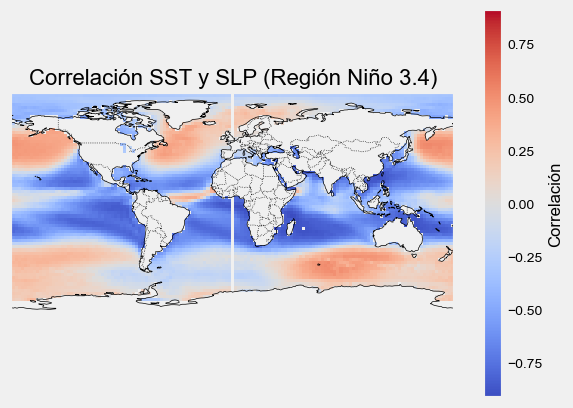

In [78]:
#Correlaciòn entre el sst y el slp
# Interpolar SST a la rejilla espacial de SLP
sst_interp = df_sst.interp(lat=df_slp['lat'], lon=df_slp['lon'], method='linear')

# Asegurarse de que las dimensiones temporales sean iguales
common_time = np.intersect1d(df_sst['time'], df_slp['time'])
sst_common = sst_interp.sel(time=common_time)
slp_common = df_slp.sel(time=common_time)

# Calcular la correlación entre SST y SLP en cada punto geográfico
correlation = xr.corr(sst_common['sst'], slp_common['slp'], dim='time')

# Crear la gráfica con un mapa del mundo usando Cartopy
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
correlation.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Correlación'})

# Añadir características geográficas al mapa
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Correlación SST y SLP (Región Niño 3.4)', fontsize=16)

# Mostrar el mapa
plt.show()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Correlación de Pearson: -0.6836942525761007
Valor p: 1.3566573455249324e-69


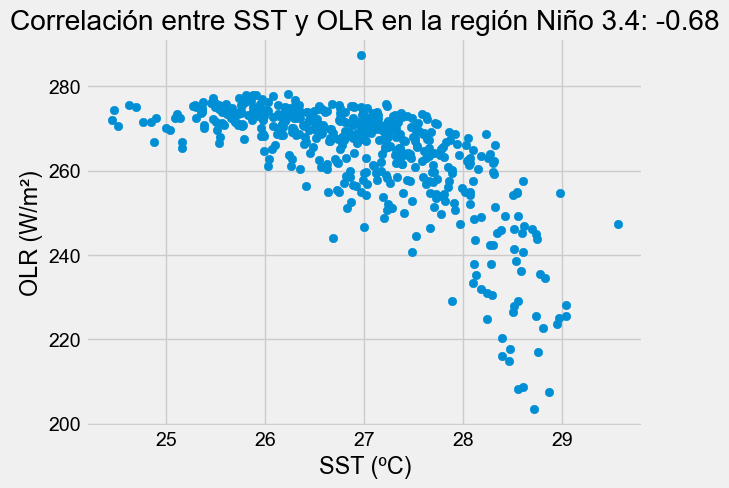

In [84]:
import xarray as xr
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que ya cargaste tus datasets de SST y OLR en los objetos df_sst y df_olr
# Y los has recortado a la región Niño 3.4

# Coordenadas para la región Niño 3.4 (5°N-5°S, 170°W-120°W)
lat_bnds = [-5, 5]
lon_bnds = [190, 240]  # Convertimos longitudes al rango de 0 a 360

# Recortar SST y OLR a la región Niño 3.4, ajustando el orden de latitudes si es necesario
sst_nino34 = df_sst.sel(lat=slice(lat_bnds[0], lat_bnds[1]), lon=slice(lon_bnds[0], lon_bnds[1]))
olr_nino34 = df_olr.sel(lat=slice(lat_bnds[1], lat_bnds[0]), lon=slice(lon_bnds[0], lon_bnds[1]))  # Nota el orden de latitudes invertido

# Promediar espacialmente en la región Niño 3.4
sst_nino34_mean = sst_nino34.mean(dim=['lat', 'lon'])
olr_nino34_mean = olr_nino34.mean(dim=['lat', 'lon'])

# Alinear los tiempos entre ambos datasets
sst_nino34_mean, olr_nino34_mean = xr.align(sst_nino34_mean, olr_nino34_mean)

# Seleccionar la variable correcta si es un Dataset (ajusta 'nombre_variable' al nombre de tu variable real)
sst_nino34_mean = sst_nino34_mean['sst']  # Reemplaza 'nombre_variable_sst' con el nombre real
olr_nino34_mean = olr_nino34_mean['olr']  # Reemplaza 'nombre_variable_olr' con el nombre real

# Eliminar valores NaN o inf
valid_mask = np.isfinite(sst_nino34_mean.data) & np.isfinite(olr_nino34_mean.data)

# Filtrar los valores válidos
sst_valid = sst_nino34_mean.data[valid_mask]
olr_valid = olr_nino34_mean.data[valid_mask]

# Verificar si los datos están correctamente en formato NumPy
print(type(sst_valid), type(olr_valid))  # Deben ser arrays NumPy

# Calcular la correlación de Pearson entre SST y OLR
if len(sst_valid) > 0 and len(olr_valid) > 0:  # Asegurarse de que no están vacíos
    corr, p_value = pearsonr(sst_valid, olr_valid)
    print(f'Correlación de Pearson: {corr}')
    print(f'Valor p: {p_value}')
else:
    print('No hay suficientes datos válidos para calcular la correlación.')

# Graficar los resultados
plt.scatter(sst_valid, olr_valid)
plt.title(f'Correlación entre SST y OLR en la región Niño 3.4: {corr:.2f}')
plt.xlabel('SST (ºC)')
plt.ylabel('OLR (W/m²)')
plt.show()


In [38]:
olr_nino34_mean

<xarray.DataArray 'olr' (time: 496)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2022-12-01